# Intro

This project is made by Open University Computer Science students Vitaly Chait and Gabriel Shapiro. We debated on what our project should be about and we landed on the idea of profanity identification within text. We both saw the need for this type of technology to be implemented within the social media universe and we were both very interested to get to work.

![Profanity_intro](https://www.theoakleafnews.com/wp-content/uploads/2018/04/Profanity-illustration-900x675.jpg)

## The Problem / Solution

There is a constant rise to the number of devices connected to the web (IOT) and the content being spread by different people across the globe. Also, the starting age of the user is constantly decreasing to our new reality, a reality where every elementary school and even kindergarten kids are already surfing in the open web alone without any parent supervising their activity. 

### This leads us to the idea of our final data science & machine learning project.
The project will create a scoring system, that will give a pass \ no pass to content loading to its interface. Underage browsers will be able to see content that is suitable for their age by only including text that matches their threshold of profanity. There are many obstacles that must be tested for in order for the model to have a good reliability rating of correct classification. The english language is very safisticated with its grammar, and the meaning of a sentence can change with one word or one symbol. We will be working with datasets of collected sentences from the internet that we will be able to register inside our testing model and classify each sentence with a profanity grade.

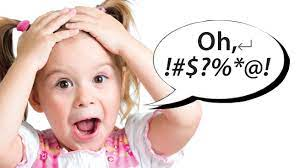

# 1. INIT and prerequisites 

[Download and install Visual Studio](https://visualstudio.microsoft.com/downloads/)

### If you have an Nvidia GPU you are welcomed to download CUDA 
[CUDA](https://developer.nvidia.com/cuda-downloads) + [cudnn](https://developer.nvidia.com/cudnn)

##### @Quick Start Parameters - set True or False the parameter below for activation
<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
#@title Cloud / Local { vertical-output: true }
kaggle = False
google = True
SHORT_RUN = False
LONG_RUN = False

input_path = ""
output_path = ""
scrapy_path= ""
classes = ["Positive", "Negative"]
if kaggle:
    input_path = r"../input/" + input_path
    import sys, os
    print(paths)
    sys.path.append("/kaggle/input/scrapygoodnews")
    output_path = r"/kaggle/working/"
if google:
    from google.colab import drive
    import sys, os
    drive.mount('/content/drive')
    input_path = "/content/drive/MyDrive/Colab Notebooks/"
    sys.path.append("/content/drive/MyDrive/Colab Notebooks/scrapygoodnews")

if not os.path.isdir(output_path+"saved_runs"):
        os.mkdir(output_path+"saved_runs")
if not os.path.isdir(output_path+"saved_runs/"+"tfidf"):
        os.mkdir(output_path+"saved_runs/"+"tfidf")
if not os.path.isdir(output_path+"saved_runs/"+"word2vec"):
        os.mkdir(output_path+"saved_runs/"+"word2vec")
if not os.path.isdir(output_path+"saved_runs/"+"elmo"):
        os.mkdir(output_path+"saved_runs/"+"elmo")
if not os.path.isdir(output_path+"saved_runs/"+"bert"):
        os.mkdir(output_path+"saved_runs/"+"bert")
if not os.path.isdir(output_path+"output"):
        os.mkdir(output_path+"output")
if not os.path.isdir(output_path+"output/"+"database"):
        os.mkdir(output_path+"output/"+"database")
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Libraries

In [ ]:
#@title Libraries
import platform
import os

print(os.getcwd())
try:
    os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin") #Vitaly CUDA v11.2 
except:
    print("")
    

try:
    import scrapy
except:
    !pip3 install Scrapy
    import scrapy
    
try:
    import cv2
except:
    !pip3 install cv2
    import cv2
    
try:
    import pandas
except:
    !pip3 install pandas
    import pandas
    
try:
    import PIL
except:
    !pip3 install pillow
    import PIL
    
try:
    import numpy
except:
    !pip3 install numpy
    import numpy
    
try:
    import joblib
except:
    !pip3 install joblib
    import joblib
    
try:
    import sklearn
except:
    !pip3 install scikit-learn
    import sklearn
#!pip3 install scikit-learn==0.24.1

try:
    import nltk
except:
    !pip3 install nltk
    import nltk

try:
    nltk.download('popular')
except:
    print("Could not download NLTK packages")

try:
    import tensorflow
except:
    !pip3 install tensorflow 
    import tensorflow
    
try:
    import matplotlib
except:
    !pip3 install matplotlib
    import matplotlib
    
try:
    import IPython
except:
    !pip3 install IPython
    import IPython

try:
    import spacy
except:
    !pip3 install spacy
    import spacy
    
try:
    import seaborn
except:
    !pip3 install seaborn
    import seaborn
    
try:
    import statsmodels
except:
    !pip3 install statsmodels
    import statsmodels

!pip install --upgrade gensim
try:
    import gensim
except:
    !pip3 install gensim
    import gensim

try:
    c
except:
    !pip3 install statsmodels
    import gensim
    
try:
    import requests
except:
    !pip3 install requests
    import requests
    
try:
    import statsmodels
except:
    !pip3 install statsmodels
    import statsmodels
    
try:
    import tqdm
except:
    !pip3 install tqdm
    import tqdm
    
try:
    import pytesseract
except:
    !pip3 install pytesseract
    import pytesseract
    
try:
    import transformers
except:
    !pip3 install transformers
    import transformers
    
try:
    import bertviz
except:
    !pip3 install bertviz
    import bertviz
    
try:
    import importlib
except:
    !pip3 install importlib
    import importlib
    
try:
    import wordcloud
except:
    !pip3 install wordcloud
    import wordcloud

In [ ]:
#@title Versions { vertical-output: true }
print("Python version: {:>30}".format(platform.python_version()))
print("pytesseract version: {:>25}".format(pytesseract.__version__))
print("transformers version: {:>25}".format(transformers.__version__))
print("requests version: {:>29}".format(requests.__version__)) 
print("tqdm version: {:>33}".format(tqdm.__version__))
print("statsmodels version: {:>26}".format(statsmodels.__version__))
print("nltk version: {:>32}".format(nltk.__version__)) 
print("gensim version: {:>30}".format(gensim.__version__))  
print("statsmodels version: {:>26}".format(statsmodels.__version__))  
print("seaborn version: {:>30}".format(seaborn.__version__))
print("spacy version: {:>31}".format(spacy.__version__))
print("matplotlib version: {:>26}".format(matplotlib.__version__))
print("IPython version: {:>30}".format(IPython.__version__))
print("tensorflow version: {:>26}".format(tensorflow.__version__))
print("sklearn version: {:>30}".format(sklearn.__version__))
print("joblib version: {:>30}".format(joblib.__version__))
print("numpy version: {:>32}".format(numpy.__version__))
print("PIL version: {:>33}".format(PIL.__version__))
print("OpenCV version: {:>30}".format(cv2.__version__))
print("pandas version: {:>30}".format(pandas.__version__))
print("scrapy version: {:>30}".format(scrapy.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
import multiprocessing 

Python version:                         3.7.12
pytesseract version:                     0.3.8
transformers version:                    4.11.3
requests version:                        2.23.0
tqdm version:                            4.62.3
statsmodels version:                     0.10.2
nltk version:                            3.2.5
gensim version:                          4.1.2
statsmodels version:                     0.10.2
seaborn version:                         0.11.2
spacy version:                           2.2.4
matplotlib version:                      3.2.2
IPython version:                          5.5.0
tensorflow version:                      2.6.0
sklearn version:                            1.0
joblib version:                          1.0.1
numpy version:                           1.19.5
PIL version:                             7.1.2
OpenCV version:                          4.1.2
pandas version:                          1.1.5
scrapy version:                          2.5.1


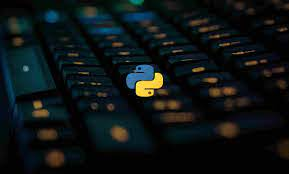

##### @GPU_ENABLED - set True or False the parameter below for activation
<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
GPU_ENABLED = True # Change to False if you don't have GPU

In [ ]:
if GPU_ENABLED:
    physical_devices = tensorflow.config.list_physical_devices('GPU')
    print("Num GPUs:", len(physical_devices))
    try:
        spacy.prefer_gpu()
    except:
        print("Not able to activate gpu")

cores = multiprocessing.cpu_count()
print("Num CPUs:", cores)

Num GPUs: 1
Num CPUs: 2


Hi reader, if you wish to optimize performence more you can read the link below
[Feel free to read more about optimizations](https://spacy.io/usage/processing-pipelines)

<img src="https://hlassets.paessler.com/common/files/preview/sql-monitoring.png" alt="Drawing" style="width: 12000px;"/>

# 2. Data and Data Collection

### 2.1 Scrapy crawling data collection
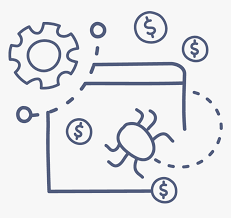

##### @Crawl - Set this parameter to "True" or "False" if you wish to activate it
<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
#@title Activate Crawler { vertical-output: true }
activate_crawl = False
if SHORT_RUN == True:
    activate_crawl = False

Scrappy code below. 
Blocks format is ("file_name.py", path).

<a href="https://ibb.co/KwyZ4fY"><img src="https://i.ibb.co/dgK9CVS/tree-crawl.png" alt="tree-crawl" style="width: 1300px;"></a>

##### 2.1.1.1  "items.py" file 
--> scrapygoodnews\scrapygoodnews\items.py

In [ ]:
import scrapy

class ScrapygoodnewsItem(scrapy.Item):
    story = scrapy.Field()
    url = scrapy.Field()

##### 2.1.1.2  "goodnews_scrape.py" file 
--> scrapygoodnews\scrapygoodnews\spiders\goodnews_scrape.py

In [ ]:
import scrapy

class Goodnews(scrapy.Spider):
    name = "my_scraper"
    custom_settings = {
        'FEEDS': {
            'scrapygoodnews\scrapygoodnews\output\stories.csv': {
                'format': 'csv',
                'overwrite': True
            }
        }}

    allowed_domains = ['www.goodnewsnetwork.org']
    # First Start Url
    start_urls = ["https://www.goodnewsnetwork.org/category/news/page/1/"]
    n_pages = 10**5

    for i in range(2, n_pages):
        start_urls.append("https://www.goodnewsnetwork.org/category/news/page/" + str(i))

    def parse(self, response):
        for href in response.xpath(
                '//h3[@class="entry-title td-module-title"]//@href').extract():
            yield scrapy.Request(href, callback=self.parse_dir_contents)

    def parse_dir_contents(self, response):
        item = ScrapygoodnewsItem()

        # Getting Story
        story_list = response.xpath('//div[@class="td-post-content"]//p/text()').extract()
        story_list = [x.strip() for x in story_list if len(x.strip()) > 0]

        if len(story_list) > 0:
            item['story'] = " ".join(story_list)# Url (The link to the page)
            item['url'] = response.xpath("//meta[@property='og:url']/@content").extract()
            yield item
        else:
            pass

##### 2.1.1.3 settings.py --> \scrapygoodnews\scrapygoodnews\settings.py

In [ ]:
# Scrapy settings for scrapygoodnews project
#
# For simplicity, this file contains only settings considered important or
# commonly used. You can find more settings consulting the documentation:
#
#     https://docs.scrapy.org/en/latest/topics/settings.html
#     https://docs.scrapy.org/en/latest/topics/downloader-middleware.html
#     https://docs.scrapy.org/en/latest/topics/spider-middleware.html
import logging

BOT_NAME = 'scrapygoodnews'

SPIDER_MODULES = ['spiders']
NEWSPIDER_MODULE = 'spiders'
    


# Crawl responsibly by identifying yourself (and your website) on the user-agent
USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'

# Obey robots.txt rules
ROBOTSTXT_OBEY = True

LOG_LEVEL = logging.WARNING

# Configure maximum concurrent requests performed by Scrapy (default: 16)
#CONCURRENT_REQUESTS = 32

# Configure a delay for requests for the same website (default: 0)
# See https://docs.scrapy.org/en/latest/topics/settings.html#download-delay
# See also autothrottle settings and docs
#DOWNLOAD_DELAY = 3
# The download delay setting will honor only one of:
#CONCURRENT_REQUESTS_PER_DOMAIN = 16
#CONCURRENT_REQUESTS_PER_IP = 16

# Disable cookies (enabled by default)
COOKIES_ENABLED = False

# Disable Telnet Console (enabled by default)
TELNETCONSOLE_ENABLED = False

# Override the default request headers:
#DEFAULT_REQUEST_HEADERS = {
#   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
#   'Accept-Language': 'en',
#}

# Enable or disable spider middlewares
# See https://docs.scrapy.org/en/latest/topics/spider-middleware.html
#SPIDER_MIDDLEWARES = {
#    'scrapygoodnews.middlewares.ScrapygoodnewsSpiderMiddleware': 543,
#}

# Enable or disable downloader middlewares
# See https://docs.scrapy.org/en/latest/topics/downloader-middleware.html
#DOWNLOADER_MIDDLEWARES = {
#    'scrapygoodnews.middlewares.ScrapygoodnewsDownloaderMiddleware': 543,
#}

# Enable or disable extensions
# See https://docs.scrapy.org/en/latest/topics/extensions.html
#EXTENSIONS = {
#    'scrapy.extensions.telnet.TelnetConsole': None,
#}

# Configure item pipelines
# See https://docs.scrapy.org/en/latest/topics/item-pipeline.html
#ITEM_PIPELINES = {
#    'scrapygoodnews.pipelines.ScrapygoodnewsPipeline': 300,
#}

# Enable and configure the AutoThrottle extension (disabled by default)
# See https://docs.scrapy.org/en/latest/topics/autothrottle.html
#AUTOTHROTTLE_ENABLED = True
# The initial download delay
#AUTOTHROTTLE_START_DELAY = 5
# The maximum download delay to be set in case of high latencies
#AUTOTHROTTLE_MAX_DELAY = 60
# The average number of requests Scrapy should be sending in parallel to
# each remote server
#AUTOTHROTTLE_TARGET_CONCURRENCY = 1.0
# Enable showing throttling stats for every response received:
#AUTOTHROTTLE_DEBUG = False

# Enable and configure HTTP caching (disabled by default)
# See https://docs.scrapy.org/en/latest/topics/downloader-middleware.html#httpcache-middleware-settings
#HTTPCACHE_ENABLED = True
#HTTPCACHE_EXPIRATION_SECS = 0
#HTTPCACHE_DIR = 'httpcache'
#HTTPCACHE_IGNORE_HTTP_CODES = []
#HTTPCACHE_STORAGE = 'scrapy.extensions.httpcache.FilesystemCacheStorage'

##### 2.1.1.4 run_spider_file.py 
--> \scrapygoodnews\scrapygoodnews\run_spider_file.py

In [ ]:
if kaggle or google:
    from scrapygoodnews import *  
    from scrapy.settings import Settings
    from scrapy.crawler import CrawlerProcess
else:
    from scrapygoodnews.scrapygoodnews.spiders.goodnews_scrape import Goodnews
    import scrapygoodnews.scrapygoodnews.settings as my_settings
    from scrapy.settings import Settings
    from scrapy.crawler import CrawlerProcess
    
    
stop_after_crawl = True

def run_spider():
    """run spider with Goodnews"""
    # Import settings from project and not terminal default path
    crawler_settings = Settings()
    crawler_settings.setmodule(my_settings)
    crawler_settings.update({"SPIDER_MODULES": SPIDER_MODULES})
    crawler_settings.update({"NEWSPIDER_MODULE": NEWSPIDER_MODULE})

    crawler = CrawlerProcess(crawler_settings)
    # Avoid Twisted reactor issue - For running the same notebook
    print("Spider start running\n /╲/\\(╭ •̀ •́╮)/\\╱\\ \t /╲/\\(╭ •̀ •́╮)/\╱\\ \t /╲/\\(╭ •̀ •́╮)/\\╱\\")
    crawler.crawl(Goodnews)
    crawler.start(stop_after_crawl=stop_after_crawl)
    print("Spider end")

In [ ]:
if activate_crawl:
    run_spider()

<img src="https://www.springboard.com/library/static/fc5022f0026f5380ffc5802111b21527/bbc2a/DSC-Article-DSC-Roles-DataScientist.png" alt="Drawing" style="width: 800px;"/>

## 2.2 The Data

We will begin with explaining the datasets that we are working with. These are built quite differently.


#### 2.2.1 Data_a
The dataset contains twitter comments with a class column that that gives 1 if there is offensive language, 0 if there is hate speech and 2 if there is neither.


#### 2.2.2 Data_b
The dataset is from wikipedia texts classifies whether each text is toxic speech or threatining speech or other types, and we were able to take that and say that if any of those classifications exist that we can label it as profane language.


#### 2.2.3 Data_c
We will also use data from sources that were not manually labeled as part of a sponsored project (Keggle/etc..), this type of data is generated from known sources with high rate of success being correct without manual verification. 
We used scrappy opensource package to crawl "https://www.goodnewsnetwork.org/" and extract the text from the articles that were posted there. 


#### 2.2.4 Data_d, e, f, g, h
Random lists of bad words we found online that come in different formats

####  2.2.5 Data - Source URLS

##### 2.2.5.1 Labled Datasets
[Database 1 - Source](https://github.com/t-davidson/hate-speech-and-offensive-language/tree/master/data)

[Database 2 - Source](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/)


##### 2.2.5.2 Scrapy
[The good news network website](https://www.goodnewsnetwork.org/more/about-us/)


##### 2.2.5.3 Bad words lists
[DB4](https://github.com/web-mech/badwords/blob/master/lib/lang.json)
[DB5](http://www.bannedwordlist.com/)
[DB6](https://www.freewebheaders.com/bad-words-list-and-page-moderation-words-list-for-facebook/)
[DB7](https://www.freewebheaders.com/youtube-blacklist-words-list-youtube-comment-moderation/)
[DB8](https://www.freewebheaders.com/full-list-of-bad-words-banned-by-google/)


<img src="https://ugc.futurelearn.com/uploads/images/b2/8f/b28f7f9d-1343-4bb7-9c09-9c3beb76fad7.png" alt="Drawing" style="width: 800px;"/>

## 2.3 Handling the data

After we gather the datasets that we want to use we have to clean the text of any superfluous characters that will not help us with detremining the sentiment of the sentence. 
The template should be some how similiar to "yes \ no" of whether the text (sentences) are offensive or not.

So the goal is that for each row  we shall provide a binary indexing of "Offensive" or not. 
To have a uniform text template we shall use filtering techniques such as splits of the parahraph to sentences, tokenizations, characters removals and more. 
In addition we shall add another column of the words counts. This can help with determing the "weight" of the word on the sentence

<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
#@title Activate DATA handling
activate_db_filtering = True
if SHORT_RUN == True:
    activate_db_filtering = False
if LONG_RUN == True:
    activate_db_filtering = True

### 2.3.1 Importing the required packages and loading all the data from the disk into Pandas framework 

In [ ]:
#@title Libraries for DATA handling { vertical-output: true }
import pandas as pd
import re
import numpy as np
from spacy import load 
from spacy.tokenizer import Tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer, WhitespaceTokenizer
from nltk.stem import PorterStemmer
import time
import string
from requests import get

In [ ]:
#@title Database imports, with path { vertical-output: true }
if activate_db_filtering:
    data_a = pd.read_csv(input_path+'materials//Cornnel//data//data//labeled_data.csv')
    data_b = pd.read_csv(input_path+'materials//Kaggle//train//train.csv')
    data_c = pd.read_csv(input_path+'scrapygoodnews//scrapygoodnews//output//stories.csv')
    data_d = pd.read_json(input_path+'materials//badwords//word_list_a.json')
    data_e = pd.read_csv(input_path+'materials//badwords//swearWords.csv')
    data_f = pd.read_csv(input_path+'materials//badwords//format_b//facebook-bad-words-list_comma-separated-text-file_2021_01_18.txt', sep="\n")
    data_g = pd.read_csv(input_path+'materials//badwords//format_b//youtube-blacklist-words-list_comma-separated-text-file_2021-01-19.txt', sep="\n")
    data_h = pd.read_csv(input_path+'materials//badwords//full-list-of-bad-words_csv-file_2021_01_18//full-list-of-bad-words_csv-file_2021_01_18.csv')
else:
    balanced = pd.read_csv(input_path+'balanced//balanced.csv')

The format of is:
1. Have a peak on the data
2. Fine tune it
3. Have another peak on it

<img src="https://www.star-spain.com/sites/default/files/Data%20record%20filtering%20for%20terminology%20management.jpg" alt="Drawing" style="width: 400px;"/>

#### 2.3.1.1 Data - A

In [ ]:
if activate_db_filtering:
    display(data_a.head())

Unnamed: 0  count  ...  class                                              tweet
0           0      3  ...      2  !!! RT @mayasolovely: As a woman you shouldn't...
1           1      3  ...      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2           2      3  ...      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3           3      3  ...      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4           4      6  ...      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

[5 rows x 7 columns]

By peaking on the database structure, we see that it has more than 2 classifications classes. The first step is to transform it to binary (Offensive or not offensive?).
Later, we see that this data was imported from a database with Tweets, it makes sense to use the NLTK TweetTokenizer to handel the data.
Finally we use some regular expression replacments to remove unwanted string sequences from the tweet.

In [ ]:
if activate_db_filtering:
    data_a_positive = data_a[data_a["class"]==2]
    data_a_positive = pd.DataFrame(data_a_positive["tweet"])
    data_a_positive = data_a_positive.rename(columns={"tweet": "Text"})
    data_a_positive = data_a_positive.assign(Negative=[0 for i in range(len(data_a_positive))])

    data_a_negative = data_a[data_a["class"]!=2]
    data_a_negative = pd.DataFrame(data_a_negative["tweet"])
    data_a_negative = data_a_negative.rename(columns={"tweet": "Text"})
    data_a_negative = data_a_negative.assign(Negative=[1 for i in range(len(data_a_negative))])


    data_a_labeled = pd.concat([data_a_positive, data_a_negative], axis=0)

    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

    data_a_labeled['Text'] = data_a_labeled['Text'].apply(tknzr.tokenize)
    data_a_labeled['Text'] = data_a_labeled['Text'].apply(" ".join)

    data_a_labeled["Text"] = data_a_labeled["Text"].str.replace('\n', ' ', regex=False)
    data_a_labeled["Text"] = data_a_labeled["Text"].str.replace(r'("|! ! ! rt :)' , '', regex=True)
    data_a_labeled["Text"] = data_a_labeled["Text"].str.replace(r'(rt : )' , '', regex=True)

In [ ]:
if activate_db_filtering:
    display(data_a_labeled)

Text  Negative
0      ! ! ! RT : As a woman you shouldn't complain a...         0
40          momma said no pussy cats inside my doghouse          0
63      : - SimplyAddictedToGuys http://t.co/1jL4hi8Z...         0
66      : http://t.co/3gzUpfuMev  woof woof and hot s...         0
67      : Lemmie eat a Oreo & do these dishes .  One ...         0
...                                                  ...       ...
24776                                 you're all niggers         1
24777  you're such a retard i hope you get type 2 dia...         1
24778  you's a muthaf * * * in lie “ : right ! His TL...         1
24780  young buck wanna eat ! ! .. dat nigguh like I ...         1
24781              youu got wild bitches tellin you lies         1

[24783 rows x 2 columns]

#### 2.3.1.2 Data - B 
The data is slighly different but the general idea is the same. Transform to binary classes and remove unwated string sequences.

In [ ]:
if activate_db_filtering:
    display(data_b.head())

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

In [ ]:
if activate_db_filtering:
    data_b_positive = data_b.loc[(data_b['toxic']==0) & (data_b['severe_toxic']==0) & (data_b['obscene']==0) & (data_b['threat']==0) 
                                & (data_b['insult']==0) & (data_b['identity_hate']==0)]

    data_b_positive = pd.DataFrame(data_b_positive["comment_text"])
    data_b_positive = data_b_positive.rename(columns={"comment_text": "Text"})
    data_b_positive = data_b_positive.assign(Negative=[0 for i in range(len(data_b_positive))])

    data_b_negative = data_b.loc[(data_b['toxic']==1) | (data_b['severe_toxic']==1) | (data_b['obscene']==1) | (data_b['threat']==1) 
                                | (data_b['insult']==1) | (data_b['identity_hate']==1)]
    data_b_negative = pd.DataFrame(data_b_negative["comment_text"])
    data_b_negative = data_b_negative.rename(columns={"comment_text": "Text"})
    data_b_negative = data_b_negative.assign(Negative=[1 for i in range(len(data_b_negative))])


    data_b_labeled = pd.concat([data_b_positive, data_b_negative], axis=0)
    data_b_labeled["Text"] = data_b_labeled["Text"].str.replace('\n', ' ', regex=False)
    data_b_labeled["Text"] = data_b_labeled["Text"].str.replace('"', '', regex=False)

In [ ]:
if activate_db_filtering:
    display(data_b_labeled)

Text  Negative
0       Explanation Why the edits made under my userna...         0
1       D'aww! He matches this background colour I'm s...         0
2       Hey man, I'm really not trying to edit war. It...         0
3        More I can't make any real suggestions on imp...         0
4       You, sir, are my hero. Any chance you remember...         0
...                                                   ...       ...
159494     our previous conversation   you fucking shi...         1
159514                  YOU ARE A MISCHIEVIOUS PUBIC HAIR         1
159541  Your absurd edits   Your absurd edits on great...         1
159546    Hey listen don't you ever!!!! Delete my edit...         1
159554  and i'm going to keep posting the stuff u dele...         1

[159571 rows x 2 columns]

#### 2.3.1.3 Data - C
Our Scrapy collection

In [ ]:
if activate_db_filtering:
    display(data_c.head())

story                                                url
0  It’s almost time to look up, because the Orion...  https://www.goodnewsnetwork.org/orinoid-meteor...
1  While quilting bees generally conjure images o...  https://www.goodnewsnetwork.org/prison-inmates...
2  An enormous amount of the world’s emissions ar...  https://www.goodnewsnetwork.org/this-green-hyb...
3  An Apple co-founder is launching a company to ...  https://www.goodnewsnetwork.org/cofounder-of-a...
4  Meet the teen who entered the US Open while ra...  https://www.goodnewsnetwork.org/emma-raducanu-...

##### 2.3.1.3.1 Porter Stemming 
We can use porter stemming to reduce the complexity, I eventually chose not to use it

<img src="http://ksabnajdorperp.janbasktraining.in/community/uploads/4af37b87638ff2b7386c7e5764d2fa12.png" alt="Drawing" style="width: 800px;"/>

<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
porter_filtering = False

In [ ]:
#@title Porter code
if activate_db_filtering:
    data_c_story = pd.DataFrame(data_c["story"])
    splitted_data = [] 
    
    if porter_filtering:
        porter = PorterStemmer()
        for text in data_c_story["story"]:
            splitted_sent = sent_tokenize(text)
            for sent in splitted_sent:
                token_words = word_tokenize(sent)
                portered = [porter.stem(word) for word in token_words]
                splitted_data.append(" ".join(portered))
    else:
        for text in data_c_story["story"]:
            splitted = sent_tokenize(text)
            for i in splitted:
                splitted_data.append(i)
    
    splitted_data = pd.DataFrame(splitted_data, columns=["Text"])
    data_c_labeled = splitted_data.assign(Negative=[0 for i in range(len(splitted_data))])
        

In [ ]:
if activate_db_filtering:
    display(data_c_labeled)

Text  Negative
0       It’s almost time to look up, because the Orion...         0
1       You’ll be able to see the shooting stars witho...         0
2       But to see them at their very best, you’ll wan...         0
3       What is it, precisely, that you’re watching in...         0
4       That’d be trails of cosmic dust from Halley’s ...         0
...                                                   ...       ...
218084  Significantly, Maryland will become only the s...         0
218085  a state producing a majority of its electricit...         0
218086  No state in America has passed legislation tha...         0
218087         The House voted 107-27 to approve the act.         0
218088                                                 in         0

[218089 rows x 2 columns]

#### 2.3.1.4 Data - D
More data, this time a lists of negative words

In [ ]:
if activate_db_filtering:
    display(data_d.head())

words
0    ahole
1     anus
2   ash0le
3  ash0les
4  asholes

In [ ]:
#@title Handling { vertical-output: true }
if activate_db_filtering:
    data_d_labeled = data_d.rename(columns={"words": "Text"})
    data_d_labeled = data_d_labeled.assign(Negative=[1 for i in range(len(data_d_labeled))])
    

In [ ]:
if activate_db_filtering:
    display(data_d_labeled)

Text  Negative
0       ahole         1
1        anus         1
2      ash0le         1
3     ash0les         1
4     asholes         1
..        ...       ...
442  wetback*         1
443   wichser         1
444      wop*         1
445       yed         1
446  zabourah         1

[447 rows x 2 columns]

#### 2.3.1.5 Data - E

In [ ]:
if activate_db_filtering:
    display(data_e.head())

Empty DataFrame
Columns: [anal, anus, arse, ass, ballsack, balls, bastard, bitch, biatch, bloody, blowjob, blow job, bollock, bollok, boner, boob, bugger, bum, butt, buttplug, clitoris, cock, coon, crap, cunt, damn, dick, dildo, dyke, fag, feck, fellate, fellatio, felching, fuck, f u c k, fudgepacker, fudge packer, flange, Goddamn, God damn, hell, homo, jerk, jizz, knobend, knob end, labia, lmao, lmfao, muff, nigger, nigga, omg, penis, piss, poop, prick, pube, pussy, queer, scrotum, sex, shit, s hit, sh1t, slut, smegma, spunk, tit, tosser, turd, twat, vagina, wank, whore, wtf]
Index: []

In [ ]:
#@title Handling { vertical-output: true }
if activate_db_filtering:
    data_e_labeled = [[i, 1] for i in data_e]
    data_e_labeled = pd.DataFrame(data_e_labeled, columns = ["Text", "Negative"])

In [ ]:
if activate_db_filtering:
    display(data_e_labeled)

Text  Negative
0       anal         1
1       anus         1
2       arse         1
3        ass         1
4   ballsack         1
..       ...       ...
72      twat         1
73    vagina         1
74      wank         1
75     whore         1
76       wtf         1

[77 rows x 2 columns]

#### 2.3.1.6 Data - F

In [ ]:
if activate_db_filtering:
    display(data_f.tail())

## Facebook Page Moderation Words List (Comma Separated Text File)
4  ## URL: https://www.freewebheaders.com/bad-wor...                
5                       ## Copy all the words below:                
6           ----------------------------------------                
7  4r5e, 5h1t, 5hit, a55, anal, anus, ar5e, arrse...                
8  ----------------------------------------------...

In [ ]:
#@title Handling { vertical-output: true }
if activate_db_filtering:
    data_f_labeled = data_f.iloc[7]
    data_f_labeled = [[i,1] for i in data_f_labeled[0].split(",")]
    data_f_labeled = pd.DataFrame(data_f_labeled, columns = ["Text", "Negative"])

In [ ]:
if activate_db_filtering:
    display(data_f_labeled)

Text  Negative
0                4r5e         1
1                5h1t         1
2                5hit         1
3                 a55         1
4                anal         1
...               ...       ...
1008               xx         1
1009             yaoi         1
1010   yellow showers         1
1011            yiffy         1
1012        zoophilia         1

[1013 rows x 2 columns]

#### 2.3.1.7 Data - G

In [ ]:
if activate_db_filtering:
    display(data_g.tail())

## Youtube Blacklist Words List (Comma-separated-Text-File)
3  ## URL: https://www.freewebheaders.com/youtube...         
4                       ## Copy all the words below:         
5            ##  -----------------------------------         
6  2 girls 1 cup, 2g1c, 4r5e, 5h1t, 5hit, a$$, a$...         
7  ----------------------------------------------...

In [ ]:
#@title Handling { vertical-output: true }
if activate_db_filtering:
    data_g_labeled = data_g.iloc[6]
    data_g_labeled = [[i,1] for i in data_g_labeled[0].split(",")]
    data_g_labeled = pd.DataFrame(data_g_labeled, columns = ["Text", "Negative"])

In [ ]:
if activate_db_filtering:
    display(data_g_labeled)

Text  Negative
0     2 girls 1 cup         1
1              2g1c         1
2              4r5e         1
3              5h1t         1
4              5hit         1
...             ...       ...
3461          yiffy         1
3462          yobbo         1
3463       zoophile         1
3464      zoophilia         1
3465           zubb         1

[3466 rows x 2 columns]

#### 2.3.1.8 Data - H

In [ ]:
if activate_db_filtering:
    display(data_h.head())

2 girls 1 cup  ...              ##  Full List of Bad Words (CSV File)
0          2g1c  ...                     ==============================
1          4r5e  ...                                                NaN
2          5h1t  ...  ##  This Full List of Words is provided free b...
3          5hit  ...                                                NaN
4           a$$  ...                      ##  Last Update: Jan 18, 2021

[5 rows x 4 columns]

In [ ]:
#@title Handling
if activate_db_filtering:
    data_h_labeled = data_h.iloc[:, 0]
    data_h_labeled = [[i, 1] for i in data_h_labeled]
    data_h_labeled = pd.DataFrame(data_h_labeled, columns = ["Text", "Negative"])

In [ ]:
if activate_db_filtering:
    display(data_h_labeled)

Text  Negative
0          2g1c         1
1          4r5e         1
2          5h1t         1
3          5hit         1
4           a$$         1
...         ...       ...
1728      yiffy         1
1729      yobbo         1
1730   zoophile         1
1731  zoophilia         1
1732       zubb         1

[1733 rows x 2 columns]

# 3. Cleaning the data futher for our EDA
Concating all the data from all different sources into 1 uniformed data frame 

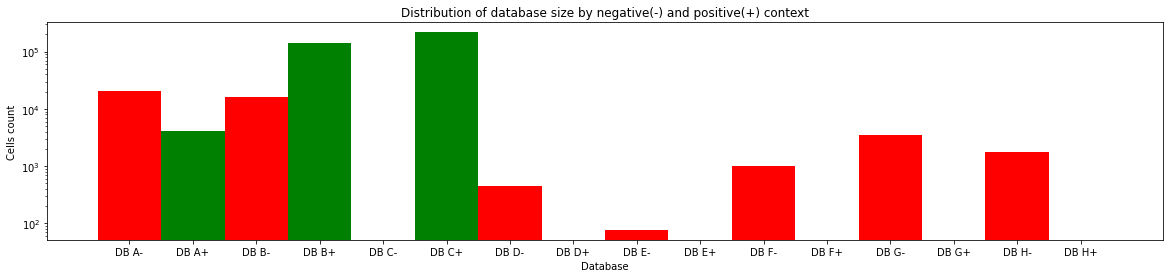

In [ ]:
#@title Context per datasheet
if activate_db_filtering:
    data_dis = pd.DataFrame([len(data_a_labeled[data_a_labeled["Negative"]==1]), len(data_a_labeled[data_a_labeled["Negative"]==0])]+[len(data_b_labeled[data_b_labeled["Negative"]==1]), len(data_b_labeled[data_b_labeled["Negative"]==0])]+[len(data_c_labeled[data_c_labeled["Negative"]==1]), len(data_c_labeled[data_c_labeled["Negative"]==0])]+[len(data_d_labeled[data_d_labeled["Negative"]==1]), len(data_d_labeled[data_d_labeled["Negative"]==0])]+[len(data_e_labeled[data_e_labeled["Negative"]==1]), len(data_e_labeled[data_e_labeled["Negative"]==0])]+[len(data_f_labeled[data_f_labeled["Negative"]==1]), len(data_f_labeled[data_f_labeled["Negative"]==0])]+[len(data_g_labeled[data_g_labeled["Negative"]==1]), len(data_g_labeled[data_g_labeled["Negative"]==0])]+[len(data_h_labeled[data_h_labeled["Negative"]==1]), len(data_h_labeled[data_h_labeled["Negative"]==0])])
    plt_x_axis = []
    color_axis = []
    [[color_axis.append("Red"), color_axis.append("Green"), plt_x_axis.append("DB "+chr(65+i)+"-"),plt_x_axis.append("DB "+chr(65+i)+"+")] for i in range(int(len(data_dis[0])/2))]
    plt.figure(figsize=(20, 4))
    plt.bar(plt_x_axis, data_dis[0], width=1, log=True, color=color_axis)
    plt.title('Distribution of database size by negative(-) and positive(+) context')
    plt.ylabel("Cells count")
    plt.xlabel("Database")
    print()
else:
    color_axis = ["Red", "Green"]

In [ ]:
#@title Concating DataFrames
if activate_db_filtering:
    data_unfinished = pd.concat([data_a_labeled,data_b_labeled,data_c_labeled, data_d_labeled, data_e_labeled, data_f_labeled, data_g_labeled, data_h_labeled], axis=0)

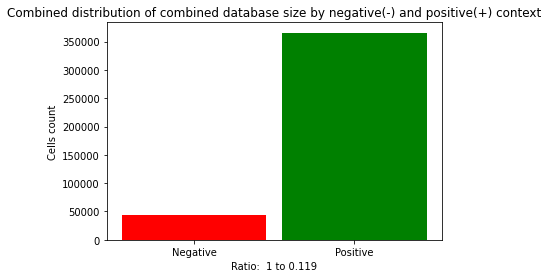

In [ ]:
#@title Total samples ratio { vertical-output: true }
if activate_db_filtering:
    neg = len(data_unfinished[data_unfinished["Negative"]==1])
    pos = len(data_unfinished[data_unfinished["Negative"]==0])
else:
    neg = len(balanced[balanced["Negative"]==1])
    pos = len(balanced[balanced["Negative"]==0])

ratio = min(neg, pos)/max(neg, pos)

plt.bar(["Negative","Positive"], [neg, pos], width=0.9, color=color_axis)
plt.title('Combined distribution of combined database size by negative(-) and positive(+) context')
plt.ylabel("Cells count")
plt.xlabel("Ratio:  1 to {}".format(round(ratio,3)))
print()

### 3.1 There are, unsuprisingly due to our data sources, more positive sentences than offensive. 

We can, by design, split the data to have the same number of positive and negative rows.
Splitting the data that way will make it a balanced classification challenge.

We will also shuffel the rows to have a uniformed data spread along the sheet.

<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>


In [ ]:
#@title Splitting Activation { vertical-output: true }
# Enable this to have 50%/50% of negative and positive
split_data = True
if SHORT_RUN == True:
    split_data = False
if LONG_RUN == True:
    split_data = True

In [ ]:
#@title Shuffling and balancing DataFrame { vertical-output: true }
if activate_db_filtering:
    if split_data:
        if neg>pos:
            negative_finished = data_unfinished[data_unfinished["Negative"]==1].sample(frac = ratio)
            positive_finished = data_unfinished[data_unfinished["Negative"]==0]
        else:
            positive_finished = data_unfinished[data_unfinished["Negative"]==0].sample(frac = ratio)
            negative_finished = data_unfinished[data_unfinished["Negative"]==1]

        # Concat 50/50 datasets 
        balanced = pd.concat([positive_finished,negative_finished], axis=0)
        # Shuffle the rows 
        balanced = balanced.sample(frac = 1).reset_index(drop=True)
        data_unbalanced = data_unfinished.sample(frac = 1).reset_index(drop=True)
    else:
        data_unbalanced = data_unfinished.sample(frac = 1).reset_index(drop=True)
        balanced = data_unbalanced

In [ ]:
display(balanced[balanced["Negative"]==0])

Text  Negative
1      You know something Kartano? You're like school...         0
4      Cheng says Beijing needs to show its legitimac...         0
5      What a bunch of smug twats these tory people r...         0
6       That image is neither a shock image nor an ex...         0
7      Celebrate.’ “It was really fun and rewarding t...         0
...                                                  ...       ...
87145  In this way they not only please the customer,...         0
87147  She then sent the goodies over to the neighbor...         0
87148  Happy to say the power of the internet came th...         0
87158    It looks like howrealisreal proved the point...         0
87161  Maurice Rowland, the cook, and Miguel Alvarez,...         0

[43581 rows x 2 columns]

In [ ]:
display(balanced[balanced["Negative"]==1])

Text  Negative
0      shut up bitch it ainn complete witout Money Me...         1
2      Lol at these honkies talking trash I'm done wi...         1
3        Unfortunately, you are an undeniable feeble ...         1
8               Dick so little ugly hoes tryna find me .         1
9                                                   kock         1
...                                                  ...       ...
87155    Why don't you get a real job and stop lookin...         1
87156  I'm pretty sure I've never sat in the friend z...         1
87157  She said pop can u make it rain I said bitch I...         1
87159  RT : You don't know maybe some bitches like a ...         1
87160     WHAT....THE...FUCK....   WHAT THE FUCK DUDE...         1

[43581 rows x 2 columns]

### 3.2 Generalize our data so that the NLP model behaves as accurate as possible

Machines are better at understanding numbers that actual text passed on as tokens.
Therefore, to overcome this problem, we: 

1. Lowercase the words. In NLP, models treat words like Dog and dog differently, even if they are the same.
2. Remove punctuations. Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis.
3. Expand contractions. Contractions are the shortened versions of words like don’t for do not. We need to expand these contractions for a better analysis of text. 
4. Removed some special characters, such as emojis, from our database. We do so if we are certian they hold no special meaning.
5. Remove STOP WORDs, words that generally do not add any information at all. Such as "The". 
6. Pass them through Tokenizer that gives the fine tunning and seperation between one word to another. (More in the next reading block). 

In [ ]:
#@title All the fine tuning - Interesting to see { vertical-output: true }
def emojis() -> str:
    page = get("https://www.unicode.org/Public/UCD/latest/ucd/emoji/emoji-data.txt") # Download the most updated codes. 
    lines = page.text.split("\n")

    blacklist = [ # blacklist of element who are not really emojis
        "number sign",
        "asterisk",
        "digit zero..digit nine",
        "copyright",
        "registered",
        "double exclamation mark",
        "exclamation question mark",
        "trade mark",
        "information"
    ]
    
    unicodes = []
    extendedEmoji = {}
    for line in lines: # check all lines
        if not line.startswith("#") and len(line) > 0: # ignores comment lines and blank lines
            if line.split(')')[1].strip() not in blacklist: # check if the emoji isn't in the blacklist
                temp = f"{line.split(';')[0]}".strip() # recovery of the first column
                if ".." in temp: # if it is a "list" of emojis, adding to a dict
                    extendedEmoji[temp.split("..")[0]] = temp.split("..")[1]
                else:
                    unicodes.append(temp)
    unicodes = list(set(unicodes) - {""}) # removal of duplicates and especially of extra spaces

    def _uChar(string: str): # choice between \u and \U in addition of the "0" to complete the code
        stringLen = len(string)
        if stringLen > 7: # Can't be more than 7 anyways
            raise Exception(f"{string} is too long! ({stringLen})")
        u, totalLong = "U", 7 # Should be 7 characters long if it is a capital U
        if stringLen < 4: # 4 characters long if smaller than 4
            u, totalLong = "u", 4 # Should be 4 characters long if it is a lowercase u
        resultat = ""
        while len(f"{resultat}{string}") <= totalLong: # Adding the 0
            resultat += "0"
        return f"\{u}{resultat}" # Return the right "U" with the right number of 0

    for i in range(0, len(unicodes)): # add unicode syntax to the list
        unicodes[i] = f"{_uChar(unicodes[i])}{unicodes[i]}"
    
    for mot in extendedEmoji.items(): # add unicode syntax to the dict
        extendedEmoji[mot[0]] = f"{_uChar(mot[1])}{mot[1]}"
        temp = f"{_uChar(mot[0])}{mot[0]}-{extendedEmoji[mot[0]]}"
        if temp not in unicodes: # if not already in the list
            unicodes.append(temp) # add the item to the list

    resultat = "["
    for code in unicodes: # conversion of the list into a string with | to separate all the emojis
        resultat += f"{code}|"

    return f"{resultat[:-1]}]+"


all_emojis = emojis()

contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

print("",end="")

In [ ]:
#@title More fine tunes { vertical-output: true }
if activate_db_filtering:
    balanced["Text"] = balanced["Text"].astype(str)
    balanced["Text"] = balanced["Text"].apply(lambda x:expand_contractions(x))
    balanced['Text'] = balanced['Text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
    balanced['Text'] = balanced['Text'].apply(lambda x: x.lower())
    balanced['Text'] = balanced['Text'].apply(lambda x: re.sub(all_emojis, '', x, flags = re.UNICODE))
    balanced["Text"] = balanced["Text"].str.replace('  ', ' ', regex=False)
    balanced = balanced[(balanced[["Text"]] != "").all(axis=1)]
    display(display(balanced.tail()))

Text  Negative
87157  she said pop can u make it rain i said bitch i...         1
87158   it looks like howrealisreal proved the point ...         0
87159  rt you do not know maybe some bitches like a m...         1
87160    whatthefuck  what the fuck dude i cant add m...         1
87161  maurice rowland the cook and miguel alvarez th...         0

None

### 3.3 Eventually we will tokenize the data with the same common tokenizer.

To give a sense of generalization to the data and make it even more uniformed we add an optional feature to transform the data once again with tokenizer.
We chose to use NLTK regex as a our final tokenizer and not other due to its speed.

<img src="https://miro.medium.com/max/505/1*yPuBXiIUgoLLzmmE_SvSNg.png" alt="Drawing" style="width: 800px;"/>

Alterntaive option is to use Spacy as a our final tokenizer and not NLTK. This is because while NLTK tokenizers can have a better taylor made solutions, Spacy tokenizer has a better "Single point solution" that generally suits all text sources.

It is important to note that usually any kind of generalization can reduce the accuracy of our model. In other words, our method will not provide the best reulsts but because the field of tokenization can have a whole notebook of itself we do not want to waste major time on that. Our point here is to enable high flexability for our datasets. Anu user might choose to add or remove some of sets in the future and will not need to customize a lot of the code. 

Also, as a side note, for dataset "A" we used NLTK tweeter custom made tokenizer. For dataset "B" we used the sentences NLTK tokenizer that provides faster tokenization.

Because of the Spacy DependencyParser, the operation takes some time. If you run it, let the computer work for a while you drink a cup of coffee a refresh ;)

[Read more about Spacy here](https://spacy.io/)

<img src="https://d33wubrfki0l68.cloudfront.net/2b4127b0cda5f6163af39732b81c233df8d3c822/819d1/tokenization-9b27c0f6fe98dcb26239eba4d3ba1f3d.svg" alt="Drawing" style="width: 400px;"/>

<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
#@title Spacy Activation { vertical-output: true }
spacy_enabled = True
nltk_regex = True

if spacy_enabled:
        try:
            sp = spacy.load('en_core_web_sm')
        except:
            !python -m spacy download en_core_web_sm


In [ ]:
#@title Spacy Tokenization { vertical-output: true }
if activate_db_filtering:
    if spacy_enabled:
        sp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
        
        # Lemmatization with stopwords removal
        balanced['sentences']=balanced['Text'].apply(lambda x: ' '.join([token.lemma_ for token in list(sp(x)) if (token.is_stop==False)]))
        
    else:
        balanced['sentences']=balanced['Text']
        
    
    if nltk_regex:
        ws_tokenize = WhitespaceTokenizer()
        balanced['sentences'] = balanced['sentences'].apply(ws_tokenize.tokenize)
        balanced['sentences'] = balanced['sentences'].apply(" ".join)
        
    balanced = balanced[(balanced[["sentences"]] != "").all(axis=1)]

### 3.4 Weight per word


We can also give weight, per word, for the sentence meaning. 

We must surely understand by now that "Fuck", a 1 word curse said alone, clearly has a negative meaning.
While other sentences, such as: "What the fuck just happend", has slighly less negative meaning.

Lets try to give these sentences weight by the inverse of the number of words

In [ ]:
#@title Average words per sentence { vertical-output: true }
if activate_db_filtering:
    # We will seperate by the word counts
    pattern = re.compile(r'\w+')
    balanced['Number of words'] = balanced['sentences'].apply(lambda x: max(1, len(pattern.findall(x))))
    balanced['Weight per word'] = balanced['Number of words'].apply(lambda x: 1/x)

### 3.5 Average word length

In [ ]:
#@title Average word length { vertical-output: true }
if activate_db_filtering:
    l = balanced["sentences"]
    w = balanced["Number of words"]

    x = [(len(i[0])-i[1]+1)/i[1] for i in zip(l,w)] 

    balanced = balanced.assign(AverageLength=x)

In [ ]:
display(balanced)

Text  ...  AverageLength
0      shut up bitch it ainn complete witout money me...  ...       4.750000
1      you know something kartano youre like school i...  ...       6.200000
2      lol at these honkies talking trash i am done w...  ...       5.428571
3       unfortunately you are an undeniable feeble pe...  ...       6.305344
4      cheng says beijing needs to show its legitimac...  ...       6.500000
...                                                  ...  ...            ...
87157  she said pop can u make it rain i said bitch i...  ...       3.916667
87158   it looks like howrealisreal proved the point ...  ...       5.480769
87159  rt you do not know maybe some bitches like a m...  ...       3.857143
87160    whatthefuck  what the fuck dude i cant add m...  ...       5.225806
87161  maurice rowland the cook and miguel alvarez th...  ...       5.555556

[86637 rows x 6 columns]

### 3.6 Removing outliers

In [ ]:
#@title Remove top2_bot2% { vertical-output: true }
if activate_db_filtering:
    prcntl = np.percentile(balanced["Number of words"], 98)
    balanced = balanced[balanced["Number of words"]<=prcntl]

    prcntl = np.percentile(balanced["AverageLength"], 98)
    balanced = balanced[(balanced["AverageLength"]<=prcntl) & (balanced["AverageLength"]>=1.5)].reset_index(drop=True) 

    display(balanced)

Text  ...  AverageLength
0      shut up bitch it ainn complete witout money me...  ...       4.750000
1      you know something kartano youre like school i...  ...       6.200000
2      lol at these honkies talking trash i am done w...  ...       5.428571
3      cheng says beijing needs to show its legitimac...  ...       6.500000
4      what a bunch of smug twats these tory people r...  ...       5.600000
...                                                  ...  ...            ...
83084  she said pop can u make it rain i said bitch i...  ...       3.916667
83085   it looks like howrealisreal proved the point ...  ...       5.480769
83086  rt you do not know maybe some bitches like a m...  ...       3.857143
83087    whatthefuck  what the fuck dude i cant add m...  ...       5.225806
83088  maurice rowland the cook and miguel alvarez th...  ...       5.555556

[83089 rows x 6 columns]

### 3.7 Saving the DataBase as a CSV file
<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
save_database = True
if SHORT_RUN == True:
    save_database = False
if LONG_RUN == True:
    save_database = True

In [ ]:
if activate_db_filtering:
    if save_database:
        balanced.to_csv(output_path+'balanced.csv', index=False)

<img src="https://imgconvert.csdnimg.cn/aHR0cHM6Ly9tbWJpei5xcGljLmNuL21tYml6X3BuZy9oZVM2d1JTSFZNblZoZ1RMWEJ5Yk1URDd6ZE84RjJrcUdwSnZFZklkWkxuRFRiRmtKNGFBaWJKSUFnSm9xdmFjU1FlU0hzU0JRemZKUFNBQ2JLZWFkS3cvNjQw?x-oss-process=image/format,png" alt="Drawing" style="width: 1000px;"/>


# 4. EDA

## 4.1 More library imports 

In [ ]:
#@title Library Imports { vertical-output: true }
#@markdown 
# Datastructures 
import numpy as np

# Save results
from joblib import dump, load

# Plots and Analysis
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels
from collections import Counter

from wordcloud import WordCloud

# Model evaluation and results
from sklearn.model_selection import train_test_split

# BoW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Temp var to save results 
result = {}
time_dict = {}

save = False
model_load = True
bow_run = True

if SHORT_RUN:
    model_load = True
    bow_run = False
if LONG_RUN:
    model_load = False
    bow_run = True

## 4.2 Database information

### 4.2.1 DB Info

In [ ]:
balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83089 entries, 0 to 83088
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Text             83089 non-null  object 
 1   Negative         83089 non-null  int64  
 2   sentences        83089 non-null  object 
 3   Number of words  83089 non-null  int64  
 4   Weight per word  83089 non-null  float64
 5   AverageLength    83089 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.8+ MB


### 4.2.2 Distribution of number of words

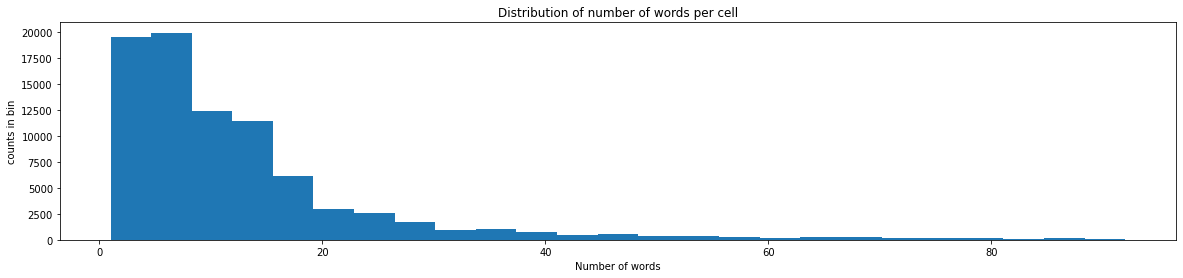

In [ ]:
#@title Histogram { vertical-output: true }
x = balanced["Number of words"]
y = balanced["Negative"]

plt.figure(figsize=(20, 4))
plt.hist(x, bins=25)
plt.title('Distribution of number of words per cell')
plt.ylabel("counts in bin")
plt.xlabel("Number of words")
print()

### 4.2.3 Distribution of context vs. number of words 

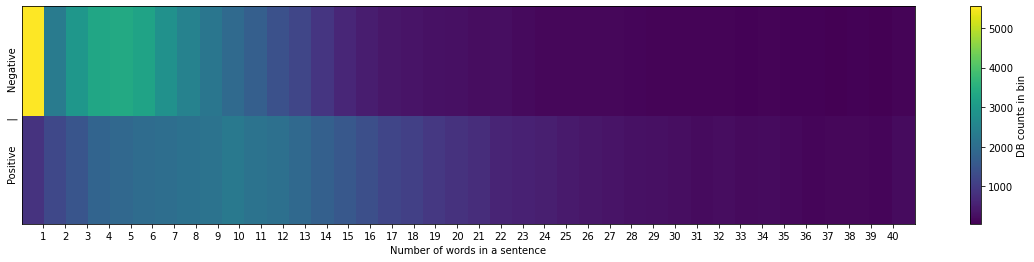

In [ ]:
#@title 2D Histogram { vertical-output: true }
sorted_list = [[j, i] for j, i in sorted(zip(x, y))]
x = [i[0] for i in sorted_list]
y = [i[1] for i in sorted_list]

plt.figure(figsize=(20, 4))
plt.hist2d(x, y, bins=[40, 2], range=[[0, 41], [0,1]], cmap='viridis')
plt.ylabel("Positive        |        Negative")
plt.ylim(0, 1)
plt.yticks([])
plt.xticks(np.arange(1,41))
plt.xlabel("Number of words in a sentence")
cb = plt.colorbar()
cb.set_label('DB counts in bin')
print()

Normalizing the plot above gives us 

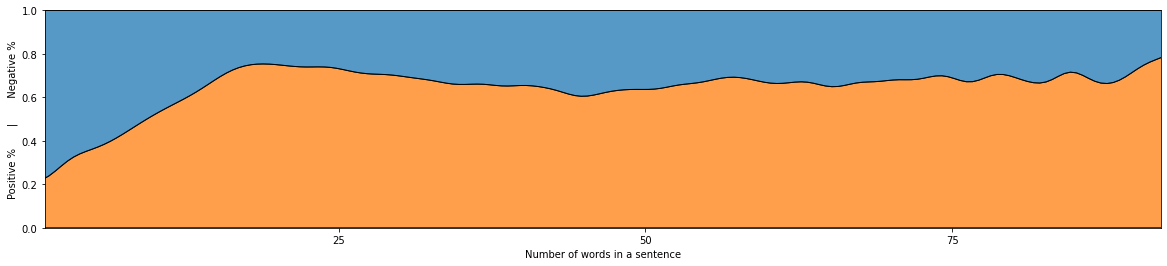

In [ ]:
#@title Plotted Sum Plot
plt.figure(figsize=(20, 4))
data = balanced
data["Positive Percentage"] = balanced['Negative'].apply(lambda x: np.abs(1-x))
g = sns.kdeplot(data=data, x="Number of words", hue="Positive Percentage", multiple="fill", legend=False)
plt.ylabel("Positive %       |        Negative %")
plt.xlim(1, min(900, max(data["Number of words"])))
plt.xlabel("Number of words in a sentence")
plt.xticks(np.arange(25, min(900, max(data["Number of words"])), step=25))
print()

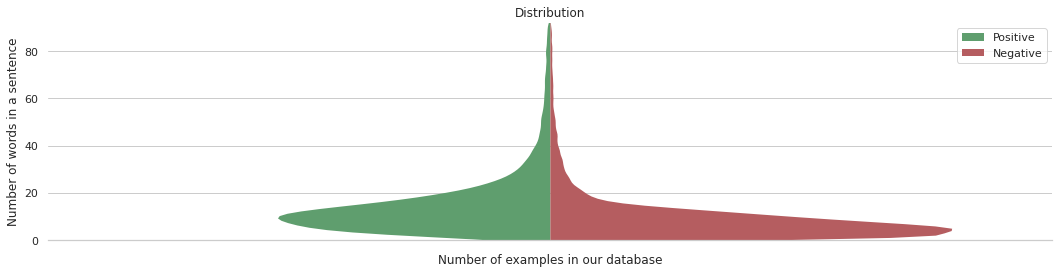

In [ ]:
#@title Violin plot
sns.set_theme(style="whitegrid")
labeled_hue = ["Negative" if i==1 else "Positive" for i in y] 
plt.figure(figsize=(18, 4))
sns.set_theme(style="whitegrid")
sns.violinplot(x=["" for i in x], y=x, hue=labeled_hue, split=True,
               scale="area", linewidth=0, palette={"Negative": "r", "Positive": "g"})
plt.ylabel("Number of words in a sentence")
plt.xlabel("Number of examples in our database")
plt.title('Distribution')
plt.ylim(0, max(x))
sns.despine(left=True)

### 4.2.4 Distribution of average words legnth 

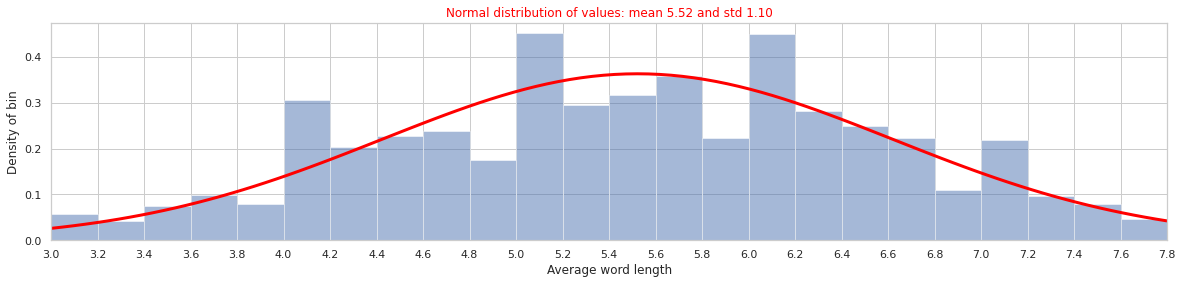

In [ ]:
#@title Average words length distribution { vertical-output: true }
y = balanced["Negative"]
x = balanced["AverageLength"] 
plt_max_range = int(np.percentile(x, 99)) 
plt_min_range = int(np.percentile(x, 1))
xRangeArr = np.arange(plt_min_range, plt_max_range, step=0.2)

xx = [i for i in x if ((i>= plt_min_range) and (i<= plt_max_range))]

mu, std = stats.norm.fit(xx) 

plt.figure(figsize=(20, 4))
plt.hist(x, bins=len(xRangeArr), density=True, range=[plt_min_range, plt_max_range], alpha=0.5)
plt.title('Distribution of average word length in a sentence')
plt.ylabel("Density of bin")
plt.xlabel("Average word length")
plt.xticks(xRangeArr)
xmin, xmax = xRangeArr[0], xRangeArr[-1]
plt.xlim(xmin, xmax)
xx = np.linspace(xmin, xmax, 100)
pp = stats.norm.pdf(xx, mu, std)
plt.plot(xx, pp, linewidth=3, color="red")
title = "Normal distribution of values: mean {:.2f} and std {:.2f}".format(mu, std)
plt.title(title, color="red")

print()

### 4.2.5 Distribution of context vs. average words legnth

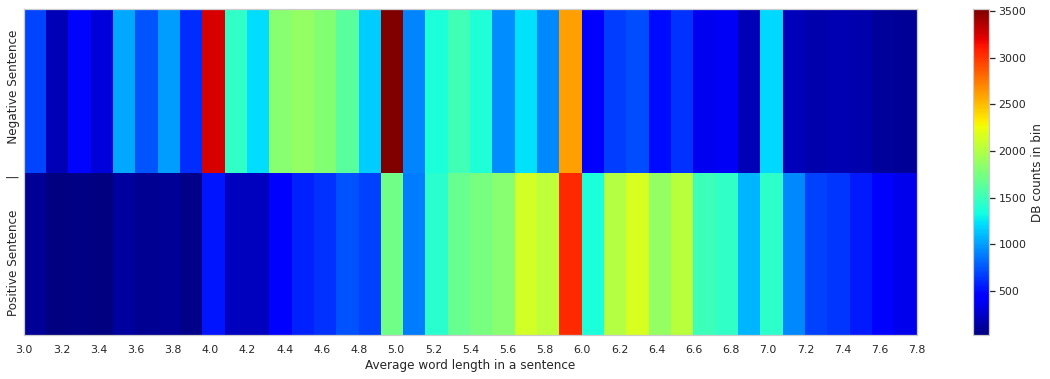

In [ ]:
#@title 2ax Histogram
plt.figure(figsize=(20, 6))
plt.hist2d(x, y, bins=[40, 2], range=[[xRangeArr[0], xRangeArr[-1]], [0,1]], cmap=plt.cm.jet)
plt.ylabel("Positive Sentence        |        Negative Sentence")
plt.ylim(0, 1)
plt.yticks([])
plt.xticks(xRangeArr)
plt.xlabel("Average word length in a sentence")
cb = plt.colorbar()
cb.set_label('DB counts in bin')

Normalizing the plot above gives us 

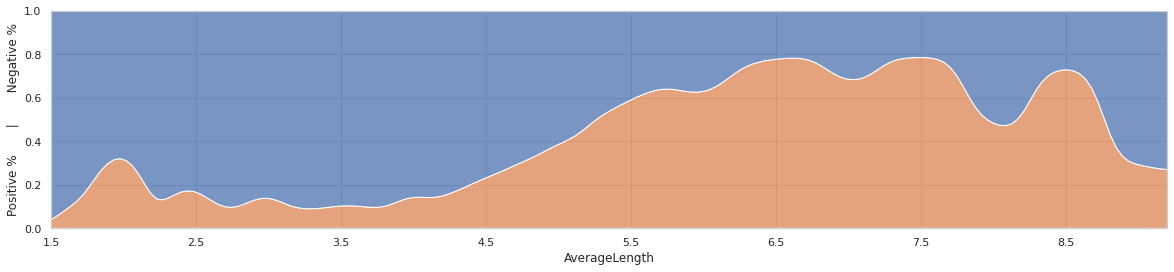

In [ ]:
#@title Sumplot of average word length
plt.figure(figsize=(20, 4))
sns.kdeplot(data=data, x="AverageLength", hue="Positive Percentage", multiple="fill", legend=False)
plt.ylabel("Positive %       |        Negative %")
plt.xlim(max(1, min(balanced["AverageLength"])), min(15, max(balanced["AverageLength"])))
plt.xticks(np.arange(max(1, min(balanced["AverageLength"])), min(15, max(balanced["AverageLength"])), step=1))
print()

### 4.2.6 Plotting the appearance frequency - most of our tokens are quite unique (Score of almost 1)
Note: Below is already implementation of BoW with TFIDF. Explanation for the code can be found in the next section

n_samples: 83089, n_features: 79594


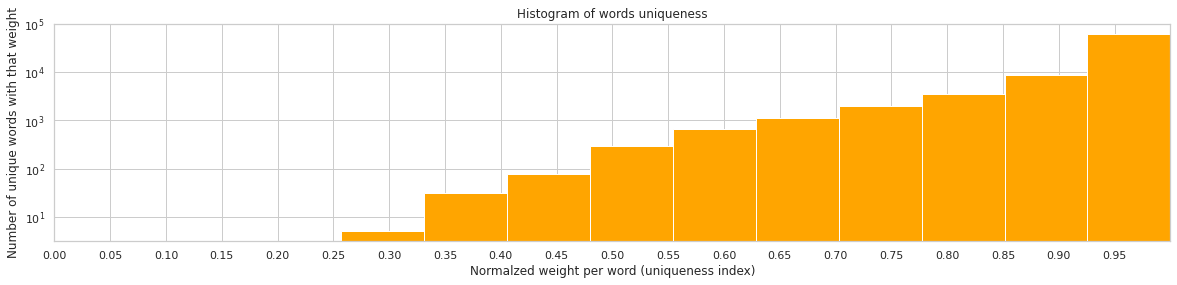

In [ ]:
#@title Word appearance frequency  { vertical-output: true }
if bow_run:
    start = time.time()
    X = balanced["sentences"]
    bag_of_words = TfidfVectorizer(stop_words="english", use_idf=True)
    X = bag_of_words.fit_transform(X) 
    end = time.time()
    time_dict["BoW_construction"] = end - start
    
    if save:
        dump(bag_of_words, output_path+"saved_runs\\tfidf\\bag_of_words.joblib")
        dump(X, output_path+"saved_runs\\tfidf\\X.joblib")
elif model_load:
    bag_of_words = load(input_path+'saved_runs\\tfidf\\bag_of_words.joblib')
    X = load(input_path+'saved_runs\\tfidf\\X.joblib')



idf_vector = bag_of_words.idf_ 
idf_vector = idf_vector / np.max(idf_vector)
counts, bins = np.histogram(idf_vector)



figure = plt.figure(figsize=(20, 4))
plt.hist(bins[:-1], bins=bins, weights=counts, color="Orange", log=True)
plt.title('Histogram of words uniqueness')
plt.xlabel('Normalzed weight per word (uniqueness index)')
plt.ylabel('Number of unique words with that weight')
plt.grid(True)
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlim(0, 1)

print("n_samples: %d, n_features: %d" % X.shape)

### 4.2.7 Early conclusions

1. There are more possible positive words available than negative words(or sentences) in our database
2. We have more "short" sentences (or even single word) than long
3. Single word cells are usually negative in our case
4. Distribution of words legnth looks like normal distribution
5. Looks like 2-4 letters words or more common to be offensive where 6-8 letters are more common to be safe
6. The total amount of unique tokens is higher than the number of samples 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1440x288 with 0 Axes>

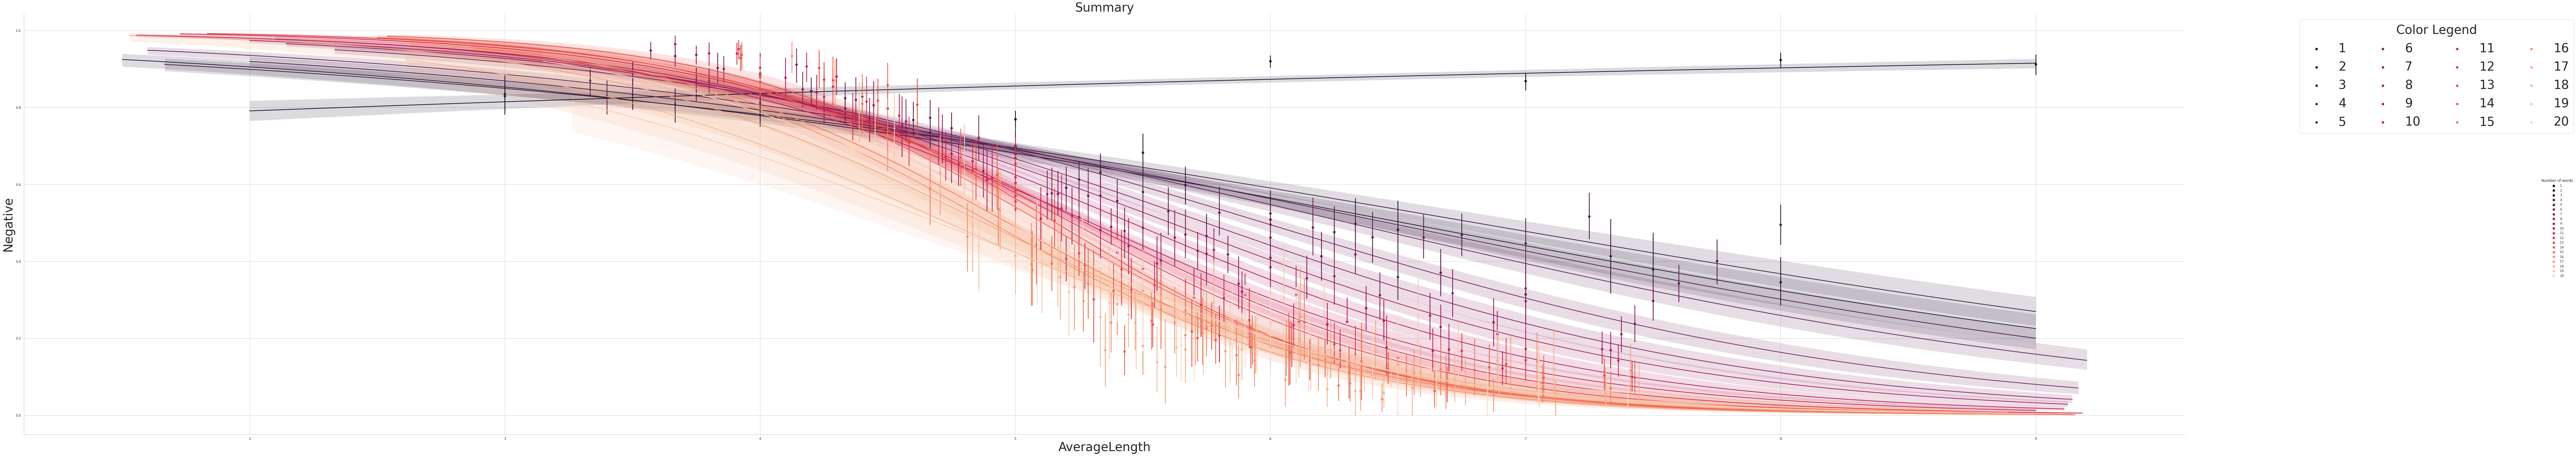

In [ ]:
#@title Regression to the findings above  { vertical-output: true }
plotting_data = balanced[balanced["Number of words"]<=20]
plotting_data = plotting_data.sort_values(by=['Number of words'])

plt.figure(figsize=(20, 4))
sns.lmplot(x="AverageLength", y="Negative", hue="Number of words", x_bins = 20, logistic=True, data=plotting_data, 
               palette="rocket", legend=True, height=20, aspect=20/4)
plt.legend(title='Color Legend', bbox_to_anchor=(1.05, 1), fontsize = 40, title_fontsize=40, ncol=4, loc='upper left')
plt.xlabel("AverageLength", fontsize=40)
plt.ylabel("Negative", fontsize=40)
plt.title("Summary", fontsize=40)
print()

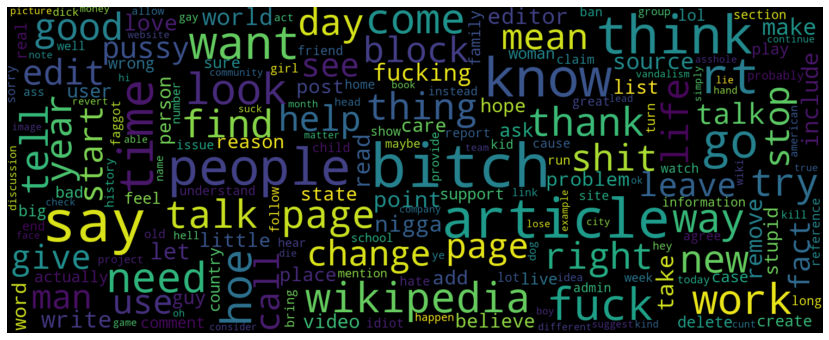

In [ ]:
#@title Word Cloud { vertical-output: true }
wordcloud = WordCloud(width=1500, height=600, max_font_size=110).generate(" ".join(balanced["sentences"])) 
plt.figure(figsize=(20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
print()

## 4.3 Word Embeddings and Language Models

Expressing power of notations used to represent a vocabulary of a language has been a great deal of interest in the field of linguistics. Languages in practice have semantic ambiguity. 

“John kissed his wife, and so did Sam”, "These are some two very beautiful apples on that woman". 
Sam kissed John’s wife or his own? These ambiguities must be handled in order to represent information in true form.

### 4.3.1 What are Word Embeddings?
Word Embeddings are the texts converted into numbers. There may be different numerical representations of the same text.
Many Machine Learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression, etc. in broad terms.

### 4.3.2 Language Models 
There are several models we shall discuss while trying to solve our problem. Some of these models, like the BoW (Bag Of Words) model, we will train ourselves. 
Others, such as the BERT (Bidirectional Encoder Representations from Transformers).

In their essense, language models (LM) are the use of various statistical and probabilistic techniques to determine the probability of a given sequence of words occurring in a sentence. Language models analyze bodies of text data to provide a basis for their word predictions. 

We devided our work to 2 kinds of Word Embeddings, 
1. Frequency based embeddings (Such as the Count vector and TF-IDF)
2. Pre-trained word embeddings (Such as Word2Vec, GloVe, BERT, fastText)


#### 4.3.3 More definitions

##### 4.3.3.1 N Grams
In addition, sentences can be splitted into "N grams", which basically means how many word tokens we take together.

<img src="https://studymachinelearning.com/wp-content/uploads/2019/09/n_gram_ex.png" alt="Drawing" style="width: 600px;"/>

Selecting the N grams range to (1,2), will provide us the following output:

('Bi-grams are cool!') == (['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])


##### 4.3.3.2 SVD 


High dimensional problem are solved by PCA or by its generalized version SVD. SVD (singular value decomposition) is a generalization of the eigen-decomposition of a positive semi-definite normal matrix to any matrix via an extension of the polar decomposition. It gives the best rank-k approximation of the original data. Let original data X be of dimension m x n. The singular value decomposition will break this into best rank approximation capturing information from most relevant to least relevant ones

The SVD include computing the pseudoinverse, matrix approximation, and determining the rank, range, and null space of a matrix. By creating an SVD we, sometimes, can decrease the amount of features we need to train a model to anticipate are results while keeping high accuracy.
In our case our issue is that the dimensions of the matrix change very often (new words are added very frequently and corpus might change in size).
Also, the matrix is extremely sparse since most words do not cooccur. There are also many features so that the reduction is somehow limmitted. 
The cost to perform SVD is Quadratid (i.e. to perform SVD). 

The elements of Sigma, namely σ₁, σ₂,… σₙ are the non-zero singular values of our Sparse Matrix "X". The higher their value the more effect 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Singular_value_decomposition.gif/280px-Singular_value_decomposition.gif" alt="Drawing" style="width: 300px;"/> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/220px-Singular_value_decomposition_visualisation.svg.png" alt="Drawing" style="width: 300px;"/>

<img src="https://miro.medium.com/max/1400/1*37a_i1t1tDxDYT3ZI6Yn8w.gif" alt="Drawing" style="width: 600px;"/>






##### 4.3.3.4 LSI 
or Latent semantic indexing is an indexing and retrieval method that uses a mathematical technique called singular value decomposition (SVD) to identify patterns in the relationships between the terms and concepts contained in an unstructured collection of text.
Efficient LSI( algorithms only compute the first k singular values and term and document vectors as opposed to computing a full SVD and then truncating it.

Note that this rank reduction is essentially the same as doing Principal Component Analysis (PCA) on the matrix A, except that PCA subtracts off the means. PCA loses the sparseness of the A matrix, which can make it infeasible for large lexicons



Read more about Rank-reduced singular value decomposition in the following link:
[SVD and LSA](https://en.wikipedia.org/wiki/Latent_semantic_analysis)

# 5. Supervised learning

## 5.1 Method 1 - Frequency based embeddings (Bag of Words and TfidfVectorizerion)

<a href="https://ibb.co/4pByhFW"><img src="https://i.ibb.co/DQ3X014/Bo-W-process.png" alt="Bo-W-process" border="0" /></a>




#### 5.1.1 The Bag of Words (BoW) 
BoW is the simplest form of text representation in numbers. Like the term itself, we can represent a sentence as a bag of words vector (a string of numbers).
In tasks in which words are features, the bag-of-words model can be used to create a feature vector when the number of features (words) is not known in advance, with the assumption that their order is not important. Each word is represented by a one-hot vector - a sparse vector in the size of the vocabulary, with 1 in the entry representing the word and 0 in all other entries. The bag-of-words feature vector is the sum of all one-hot vectors of the words, and therefore has a non-zero value for every word that occurred. 

<a href="https://ibb.co/BP8DNxM"><img src="https://i.ibb.co/xsVvH0T/bag-of.png" alt="bag-of" border="0"></a>

In the weighted variation explained below, it is a weighted sum according to frequency or TF-IDF scores

#### 5.1.2 TfidfVectorizerion is CountVectorizer (bag of words) with TfidfTransformer.
This means we basically fitst count the number of occurrences for all token and later we normalize it according to the frequencies. 

Term Frequent (Tf - CountVectorizer) is a measure of how frequently a term, t, appears in our dataset.
Inverse Document Frequency (idf) is a measure of how important a term is. We need the IDF value because computing just the Tf alone is not sufficient to understand the importance of words. Hence, we see that words like “is”, “this”, “and”, etc., are reduced to values closer to 0 and have little importance; while words like “smart”, “amazing”, etc. are words less frequent, thus with more importance. 




#### 5.1.3 An advantage with count vector (and Tfidf):
Count Vector and TF-IDF are quite easy to understand and the implementation is fairly fast to deploy.

#### 5.1.4 A clear disadvatange with count vector (and Tfidf):
Count Vector and TF-IDF do not capture the position in semantics, co-occurrences in the document, etc.
In our set of examples we might 

#### 5.1.5 Implementation 

##### 5.1.5.1 BoW words vector

In [ ]:
#@title BoW and data split { vertical-output: true }
import time
y = balanced['Negative']

if bow_run:
    start = time.time()
    X = balanced["sentences"]
    bag_of_words = TfidfVectorizer(stop_words="english", use_idf=True) # INIT the model
    X = bag_of_words.fit_transform(X)  # Transform our tokens to freq based sparse matrix 
    end = time.time()
    time_dict["BoW_construction"] = end - start
    
    if save:
        dump(bag_of_words, output_path+"saved_runs\\tfidf\\bag_of_words.joblib")
        dump(X, output_path+"saved_runs\\tfidf\\X.joblib")
elif model_load:
    bag_of_words = load(input_path+'saved_runs\\tfidf\\bag_of_words.joblib')
    X = load(input_path+'saved_runs\\tfidf\\X.joblib')
# Accuracy, Precision, Recall


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

Text(75, 75, 'White represents non zero entries')

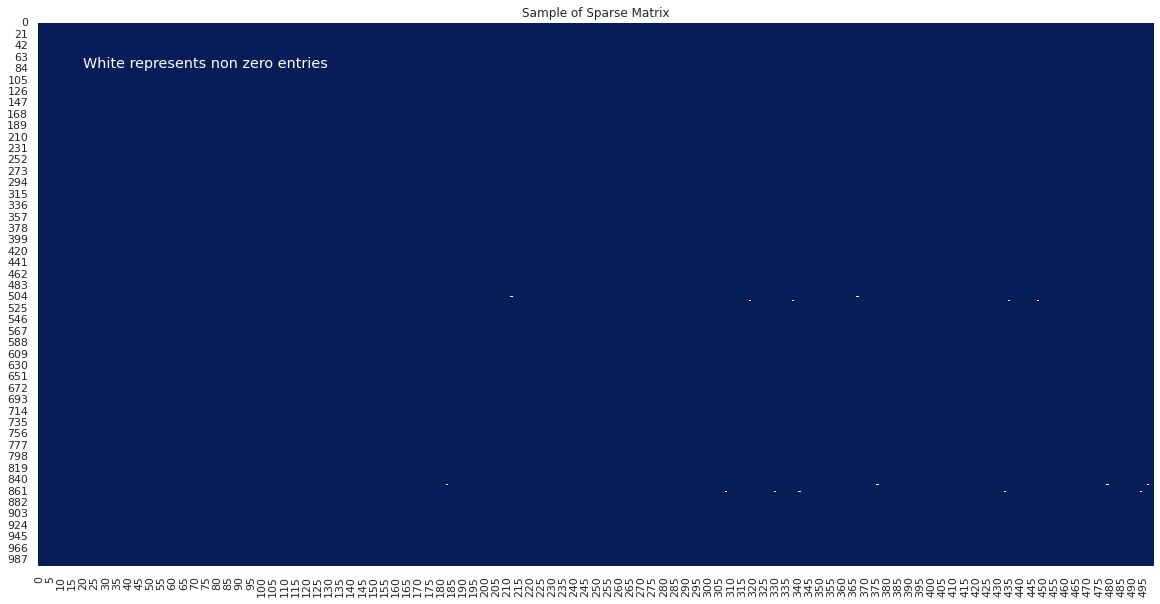

In [ ]:
#@title Sparse Matrix { vertical-output: true }
figure = plt.figure(figsize=(20, 10))
sns.heatmap(X_train[0:1000].todense()[:,np.random.randint(0,100,500)]==0, vmin=0, vmax=1, cmap="YlGnBu",cbar=False).set_title('Sample of Sparse Matrix')
plt.text(75, 75, 'White represents non zero entries', horizontalalignment='center', verticalalignment='center', size="large", color="white")

Sparse matrices are those matrices that have the majority of their elements equal to zero. In other words, the sparse matrix can be defined as the matrix that has a greater number of zero elements than the non-zero elements.
Storing only the non-zero values and their positions is a common technique in storing sparse data sets and thus avoiding handling a sparse matrix as a dense one which makes excessive use of memory.

##### 5.1.5.2 Rank Reduction
TruncatedSVD
[Read more here](https://math.stackexchange.com/questions/2627005/are-reduced-svd-and-truncated-svd-the-same-thing)

In [ ]:
#@title SVD N-Components  { vertical-output: true }
svd_enabled = True
n_components_array = [1000] 

if SHORT_RUN:
    svd_enabled = False
if LONG_RUN:
    svd_enabled = True

In [ ]:
#@title SVD - Arpack is used, change if more dim 
if bow_run:
    if svd_enabled:
        for n_components in n_components_array:
            start = time.time()
            svd = TruncatedSVD(n_components=n_components, algorithm="arpack")
            tfidf_lsa_data = svd.fit_transform(X)
            Sigma = svd.singular_values_
            V_T = svd.components_.T

            end = time.time()
            time_dict["BoW_svd_{}_construction".format(n_components)] = end - start

            if save:
                dump(svd, output_path+"saved_runs\\tfidf\\svd_{}_TruncatedSVD.joblib".format(n_components))
                dump(tfidf_lsa_data, output_path+"saved_runs\\tfidf\\svd_{}_arpack_tfidf_isa_data.joblib".format(n_components))
                dump(Sigma, output_path+"saved_runs\\tfidf\\svd_{}_arpack_sigma.joblib".format(n_components))
                dump(V_T, output_path+"saved_runs\\tfidf\\svd_{}_arpack_V_T.joblib".format(n_components))
            svd_bow_X_train,svd_bow_X_test,y_train,y_test=train_test_split(tfidf_lsa_data,y,test_size=0.2,shuffle=False)
    
    elif model_load:
        n_components = n_components_array[-1]
        tfidf_lsa_data = load(input_path+"saved_runs\\tfidf\\svd_{}_arpack_tfidf_isa_data.joblib".format(n_components))
        Sigma = load(input_path+"saved_runs\\tfidf\\svd_{}_arpack_sigma.joblib".format(n_components))
        V_T = load(input_path+"saved_runs\\tfidf\\svd_{}_arpack_V_T.joblib".format(n_components))
        svd_bow_X_train,svd_bow_X_test,y_train,y_test=train_test_split(tfidf_lsa_data,y,test_size=0.2,shuffle=False)

DIM Reduction...
|79594| ---> |1000|   ~= 1.256%
SIGMA Values...
Max|30.725| ---> Min|3.651|


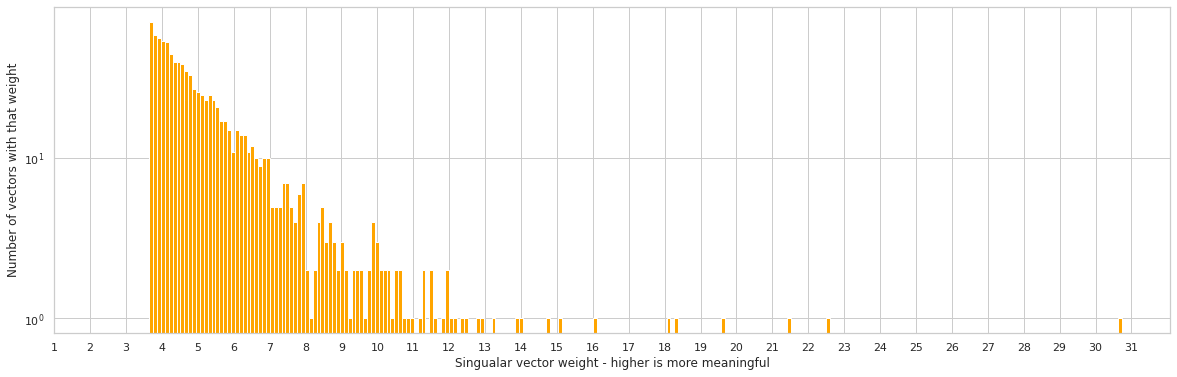

In [ ]:
#@title Plotting components weight { vertical-output: true }
if svd_enabled or model_load:
    plt.figure(figsize=(20, 6))
    counts, bins = np.histogram(Sigma, bins=int(Sigma.shape[0]/4))
    plt.hist(bins[:-1], bins=bins, weights=counts, color="Orange", log=True)
    plt.xticks(np.arange(1, np.ceil(np.max(Sigma))+1, step=1))
    
    plt.xlabel('Singualar vector weight - higher is more meaningful')
    plt.ylabel('Number of vectors with that weight')
    
print("DIM Reduction...\n|{}| ---> |{}|   ~= {}%".format(X.shape[1], tfidf_lsa_data.shape[1], np.round(tfidf_lsa_data.shape[1]/X.shape[1]*100, 3)))
print("SIGMA Values...\nMax|{}| ---> Min|{}|".format(np.round(max(Sigma), 3), np.round(min(Sigma), 3)))

Least significat vector addition:   0.008391064884038072       %
Most  significat vector addition:   0.00016130128693980672     %
Total amount of varian explained:   0.4171769787798261         %

  	 0.00839  ------------------------------> 0.04183  ------------------------------> 0.1459  ------------------------------> 0.41718  

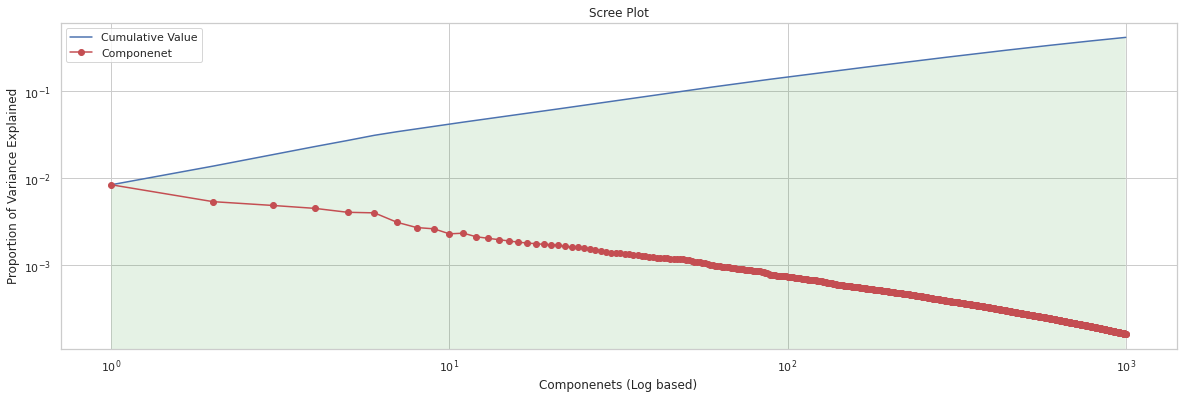

In [ ]:
#@title Plotting the effectiveness  { vertical-output: true }
if svd_enabled or model_load:
    plt.figure(figsize=(20, 6))
    show_first = int(svd.explained_variance_ratio_.shape[0])
    plot_x = np.arange(1, svd.explained_variance_ratio_.shape[0]+1, 1)
    plt.plot(plot_x[:show_first], svd.explained_variance_ratio_.cumsum()[:show_first])
    
    plt.fill_between(plot_x[:show_first], svd.explained_variance_ratio_.cumsum()[:show_first], facecolor = "green", alpha=0.1)
    
    plt.plot(plot_x[:show_first], svd.explained_variance_ratio_[:show_first], 'ro-')
    plt.legend(["Cumulative Value", "Componenet"], loc='upper left')
    plt.title('Scree Plot')
    plt.xlabel('Componenets (Log based)')
    plt.yscale("log")
    plt.ylabel('Proportion of Variance Explained')
    plt.xscale("log")
    print("Least significat vector addition:   {:<25}  %".format(svd.explained_variance_ratio_[0]))
    print("Most  significat vector addition:   {:<25}  %".format(svd.explained_variance_ratio_[-1]))
    print("Total amount of varian explained:   {:<25}  %".format(svd.explained_variance_ratio_.cumsum()[-1]))
    
    log_val = int(np.log10(show_first))
    x_column = [svd.explained_variance_ratio_.cumsum()[0]]
    [x_column.append(svd.explained_variance_ratio_.cumsum()[(10**i)-1]) for i in range(1, log_val+1)]
    x_column = np.round(x_column, 5)
    
    print("\n  \t", x_column[0], " ", end="")
    [print("------------------------------> {}  ".format(i) ,end="") for i in x_column[1:]]

Looking at the plot above we can see the clear proportions in logarithmic scale.
It appears that roughly each 2 orders of magnitude in the number of dimmensions increases our explained proportion by an order of magnitude. 

## 5.2 Models for evaluating BoW

### 5.2.1 Intro

All of our posible models are based on the idea that some words can have more than 1 meaning. How to decide whether a word has a negative or positive context is not an easy task. While some words are clearly offensive, some may or may not be offensive. Thus the splitting of the data have a critical effect of the learning and validation process. One way to overcome overfitting and reach the best results it is to use cross validation.


#### 5.2.1.1 CCCV
In our case we have a new, untrained model.
We will create our CalibratedClassifierCV. With cv in the parameters as the number of folds.
We later fit the model. Because our model is untrained, X and y have to be used for both training and calibration. 
The way to ensure the data is 'disjoint' is our cross validation: 
for any given fold, CCCV will split X and y into your training and calibration data, so they do not overlap.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/Q81RCH3/k-fold.jpg" alt="k-fold" border="0" /></a>

#### 5.2.1.2 Precision
Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.
Our data is labeld "1" as offensive. Precision will be our index for the "Positive" words labeling.


#### 5.2.1.3 Recall 
Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. 
This index is slighly more important as it reflects the ability of a model to find all the relevant cases within a data set.
For some extent, if we classify offensive data we would prefer to "filter" data that should not have been filtered rather than let some young kid recieve offensive content. 

#### 5.2.1.4 f1-score (Accuracy) 
The F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive.
The F1 score is the harmonic mean of the precision and recall

#### 5.2.1.5 AUC 
AUC means area under the curve so to speak about ROC AUC score we need to define ROC curve first. 

It is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). Basically, for every threshold, we calculate TPR and FPR and plot it on one chart.

Of course, the higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left-side are better.

#### 5.2.1.6 PR AUC | Average Precision
Similarly to ROC AUC in order to define PR AUC we need to define what Precision-Recall curve.

It is a curve that combines precision (PPV) and Recall (TPR) in a single visualization. For every threshold, you calculate PPV and TPR and plot it. The higher on y-axis your curve is the better your model performance.

You can use this plot to make an educated decision when it comes to the classic precision/recall dilemma. Obviously, the higher the recall the lower the precision. Knowing at which recall your precision starts to fall fast can help you choose the threshold and deliver a better model

#### 5.2.1.7 Confusion Matrix 
The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. These later represent the Recall and Precision. 

In [ ]:
#@title More imports { vertical-output: true }
# Models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV

from sklearn import metrics

In [ ]:
#@title Some settings for the models { vertical-output: true }
# Enable
svm = True
bernoulli_bayes = True
multinomial_bayes = True
complement_bayes = True
logistic = True
random_forest = True
neigbors = True
tree = True

# Major effect on runtime
max_iter_runtime = 10**5  # For LinearSVC
tolerance = 10**(-2)      # For LinearSVC

neighbors = 10            # K-Neighbors

min_samples_split = 2    # Decision Tree
min_samples_leaf = 1     # Decision Tree

k_fold = 5               # K fold cross validation (CV)

nb_epoch=3
batch_size=32

In [ ]:
#@title Activations { vertical-output: true }
if SHORT_RUN == True:
    svm = False
    bernoulli_bayes = False
    multinomial_bayes = False
    complement_bayes = False
    logistic = False
    random_forest = False
    neigbors = False
    tree = False
if LONG_RUN == True:
    svm = False
    bernoulli_bayes = True
    multinomial_bayes = True
    complement_bayes = True
    logistic = True
    random_forest = True
    neigbors = True
    tree = True

### 5.2.2 Naive Bayes - Bernoulli, Multinomial, Complement . In our case Multinomial.

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem

#### 5.2.2.1 Abstract equation
<a href="https://imgbb.com/"><img src="https://i.ibb.co/YcbnRrL/Naive-bayes.png" alt="Naive-bayes" border="0" /></a>

In plain English, this equation is used to answer the following question. “What is the probability of y (my output variable) given X?

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.
Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

We have added 3 examples of Naive Bayes models that might fit our needs. 
Bare in mind the Bag Of Words can be repesented as counts, binary and freq and each one of them might have different outcomes. 


#### 5.2.2.2 Multinomial Naive Bayes: 
Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification which is our case.
Our assumption is that Multinomial Naive Bayes will best fit our needs with our frequency vector

#### 5.2.2.3 Bernoulli Naive Bayes: 
In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence(i.e. a word occurs in a document or not) features are used rather than term frequencies(i.e. frequency of a word in the document)

#### 5.2.2.4 Complement Naive Bayes:
The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.
Feel free to read more here: [Rennie et al. (2003)](https://people.csail.mit.edu/jrennie/papers/icml03-nb.pdf)


In [ ]:
#@title NB_BoW_Model { vertical-output: true }
if bow_run:
# Naive Bayes
    if bernoulli_bayes:
        start = time.time()
        model = BernoulliNB()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_BernoulliNB"] = score
        print("Score for bernoulli_bayes classifier with fold={} = {} %".format(k_fold, score))
        end = time.time()
        time_dict["BoW_BernoulliNB"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\bernoulli_bayes_calibrated.joblib")
    
    if complement_bayes:
        start = time.time()
        model = ComplementNB()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_ComplementNB"] = score
        print("Score for complement_bayes classifier with fold={} = {} %".format(k_fold, score))
        end = time.time()
        time_dict["BoW_ComplementNB"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\complement_bayes_calibrated.joblib")
    
    if multinomial_bayes:
        start = time.time()
        model = MultinomialNB()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_MultinomialNB"] = score
        print("Score for multinomial_bayes classifier with fold={} = {} %".format(k_fold, score))
        end = time.time()
        time_dict["BoW_MultinomialNB"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\multinomial_bayes_calibrated.joblib")
elif model_load:
    if multinomial_bayes:
        calibrated = load(input_path+'saved_runs\\tfidf\\multinomial_bayes_calibrated.joblib')
    elif complement_bayes:
        calibrated = load(input_path+'saved_runs\\tfidf\\bernoulli_bayes_calibrated.joblib')
    elif bernoulli_bayes:
        calibrated = load(input_path+'saved_runs\\tfidf\\bernoulli_bayes_calibrated.joblib')
    else:
        calibrated = load(input_path+'saved_runs\\tfidf\\multinomial_bayes_calibrated.joblib')
        
        
            
            

Score for bernoulli_bayes classifier with fold=5 = 0.8617763870501866 %
Score for complement_bayes classifier with fold=5 = 0.9297147671199903 %
Score for multinomial_bayes classifier with fold=5 = 0.9297147671199903 %


Accuracy:        0.93        
Auc:             0.02             
Detail:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8247
           1       0.94      0.92      0.93      8371

    accuracy                           0.93     16618
   macro avg       0.93      0.93      0.93     16618
weighted avg       0.93      0.93      0.93     16618



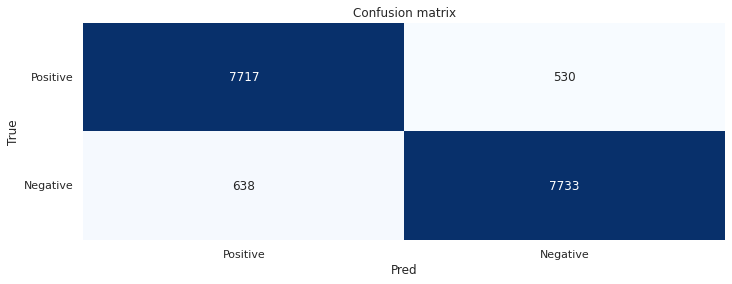

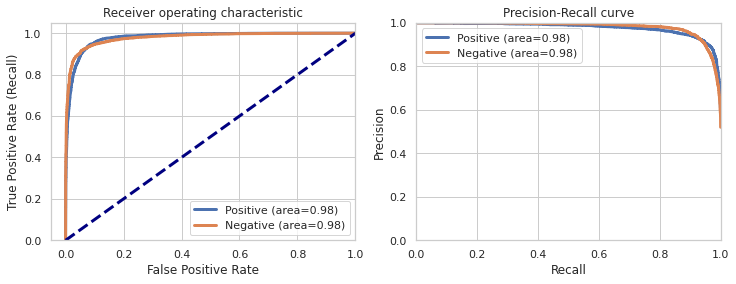

In [ ]:
#@title NB_BoW_Model_Eval { vertical-output: true }
if (multinomial_bayes or complement_bayes or bernoulli_bayes) or load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))

    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.3 K-Neighbors classifier

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other

As we increase the value of K, that is the number of neihbors, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

#### 5.2.3.1 Clear disadvantage of KNN
If we look mathematically, the simple intuition is to calculate the euclidean distance from point of interest ( of whose class we need to determine) to all the points in training set. Then we take class with majority points. This is called brute force method.
For N samples in D dimensions the running time complexity turns out to be O[DN²]. If we have small number of dimensions and training set, this would run in reasonable time. But as the training set size increases, the running time grows quickly.
Brute force performs worst when there are large dimensions and large training set.

With SKLearn fitting on sparse input always uses brute force method

<a href="https://imgbb.com/"><img src="https://i.ibb.co/GT7TQ8J/KNN.png" alt="KNN" border="0" /></a>

In [ ]:
#@title Kmeans_BoW_Model
if bow_run:
# K-Neighbors classifier
    if neigbors:
        start = time.time()
                          
        model = KNeighborsClassifier(n_neighbors=neighbors)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_KNeighborsClassifier"] = score
        print("Score for K-Neighbors classifier with neighbors={}, fold={} > {} %".format(neighbors, k_fold, score))
        end = time.time()
        time_dict["BoW_KNeighborsClassifier"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\kneighbors_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\kneighbors_calibrated.joblib') 

Score for K-Neighbors classifier with neighbors=10, fold=5 > 0.7129618485979059 %


Accuracy:        0.71        
Auc:             0.26             
Detail:
              precision    recall  f1-score   support

           0       0.64      0.95      0.77      8247
           1       0.91      0.48      0.63      8371

    accuracy                           0.71     16618
   macro avg       0.77      0.71      0.70     16618
weighted avg       0.78      0.71      0.70     16618



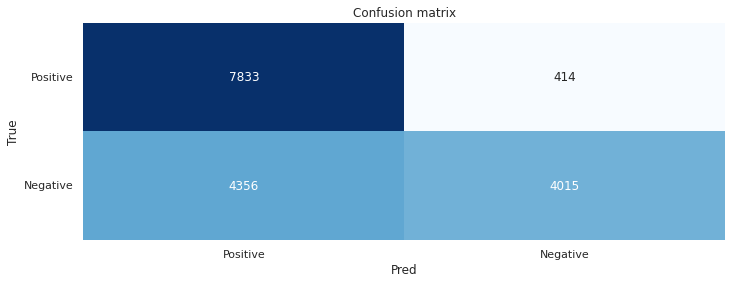

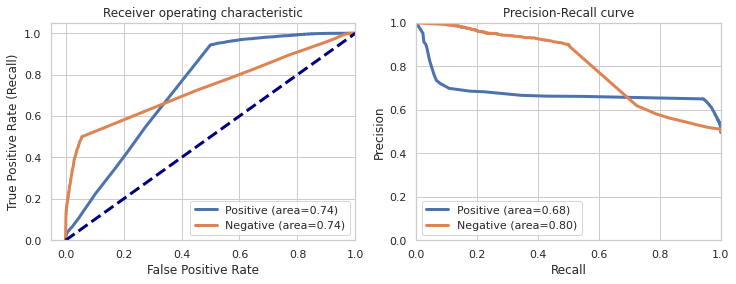

In [ ]:
#@title Kmeans_BoW_Model_Eval { vertical-output: true }
if neigbors or model_load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))

    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.4 Decision tree

Each node splits the decision and the more nodes we have, the more accurate the decision tree will be. 
The last nodes of the decision tree, the leaf, is where the decision is being made.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/cD0823g/tree-image.png" alt="tree-image" border="0" /></a>

In [ ]:
#@title DecisionTree_BoW_Model { vertical-output: true }
if bow_run:
# Decision tree classifier
    if tree:
        start = time.time()
                          
        model = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_DecisionTreeClassifier"] = score
        print("Score for Decision tree classifier with min_samples_split={}, min_samples_leaf={}, fold={} > {} %".format(min_samples_split, min_samples_leaf, k_fold, score))
        end = time.time()
        time_dict["BoW_DecisionTreeClassifier"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\tree_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\tree_calibrated.joblib') 

Score for Decision tree classifier with min_samples_split=2, min_samples_leaf=1, fold=5 > 0.9239980743771814 %


Accuracy:        0.92        
Auc:             0.05             
Detail:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      8247
           1       0.96      0.89      0.92      8371

    accuracy                           0.92     16618
   macro avg       0.93      0.92      0.92     16618
weighted avg       0.93      0.92      0.92     16618



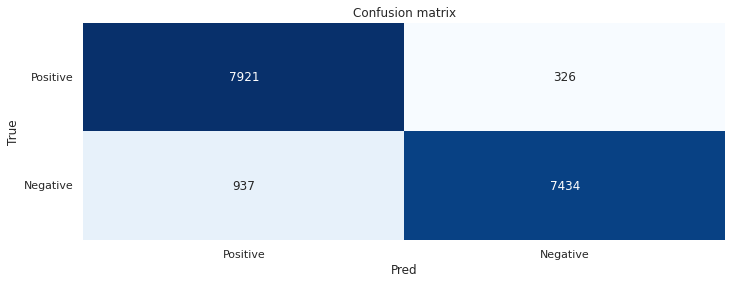

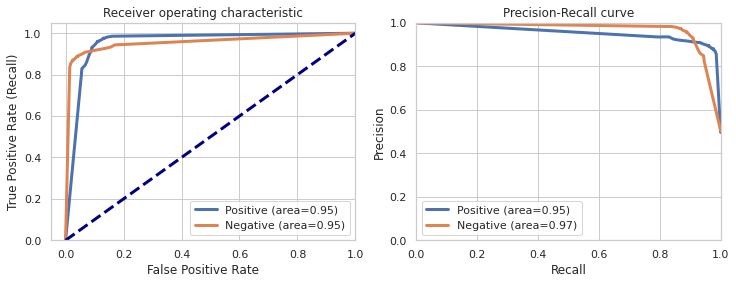

In [ ]:
#@title DecisionTree_BoW_Model_Eval
if tree or model_load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))

    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.5 RandomForestClassifier
Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. The model then selects the mode of all of the predictions of each decision tree. What’s the point of this? By relying on a “majority wins” model, it reduces the risk of error from an individual tree.

<a href="https://ibb.co/JCvZy8G"><img src="https://i.ibb.co/wYStw8P/random-forest.png" alt="random-forest" border="0" /></a>

In [ ]:
#@title RandomForest_BoW_Model { vertical-output: true }
if bow_run:
# RandomForestClassifier
    if random_forest:
        start = time.time()
        model = RandomForestClassifier()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_RandomForest"] = score
        print("Score for RandomForestClassifier classifier with fold={} > {} %".format(k_fold, score))
        end = time.time()
        time_dict["BoW_RandomForest"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\RandomForestClassifier_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\RandomForestClassifier_calibrated.joblib') 

Score for RandomForestClassifier classifier with fold=5 > 0.9342881213142376 %


Accuracy:        0.93        
Auc:             0.02             
Detail:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      8247
           1       0.96      0.91      0.93      8371

    accuracy                           0.93     16618
   macro avg       0.94      0.93      0.93     16618
weighted avg       0.94      0.93      0.93     16618



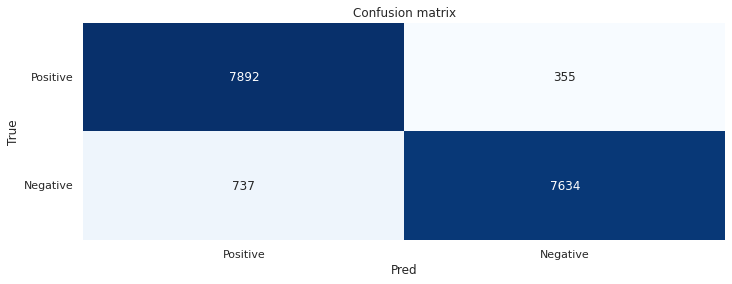

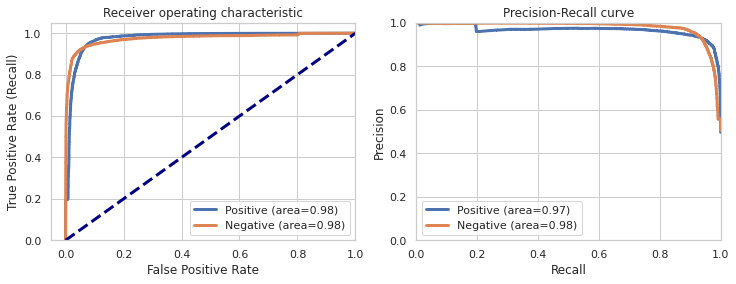

In [ ]:
#@title RandomForest_BoW_Model_Eval { vertical-output: true }
if random_forest or model_load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))

    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.6 Logistic regression
Logistic regression is similar to linear regression but is used to model the probability of a finite number of outcomes, typically two. There are a number of reasons why logistic regression is used over linear regression when modeling probabilities of outcomes.

<a href="https://ibb.co/YDm6g4G"><img src="https://i.ibb.co/28xwJ0B/Logistic-regression-and-linear-regression.png" alt="Logistic-regression-and-linear-regression" border="0" /></a>

#### 5.2.6.1 Logistic regression equation

By simple transformation, the logistic regression equation can be written in terms of an odds ratio.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/tpSvfWf/logistic-formula.png" alt="logistic-formula" border="0" /></a>


#### 5.2.6.2 Clear advantage of logistic regression

In essence, a logistic equation is created in such a way that the output values can only be between 0 and 1
The logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead, or healthy/sick.


In [ ]:
#@title LogisticRegression_BoW_Model { vertical-output: true }
if bow_run:
# LogisticRegression
    if logistic:
        start = time.time()
        model = LogisticRegression(max_iter=10000)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_LogisticRegression"] = score
        print("Score for LogisticRegression classifier with fold={} > {} %".format(k_fold, score))
        end = time.time()
        time_dict["BoW_LogisticRegression"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\logistic_reg_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\logistic_reg_calibrated.joblib') 

Accuracy:        0.93        
Auc:             0.02             
Detail:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      8247
           1       0.96      0.91      0.93      8371

    accuracy                           0.93     16618
   macro avg       0.94      0.93      0.93     16618
weighted avg       0.94      0.93      0.93     16618



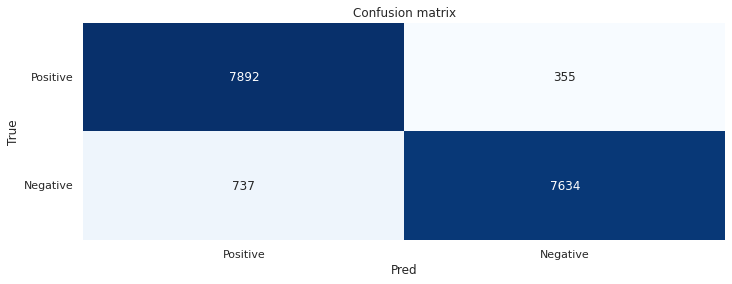

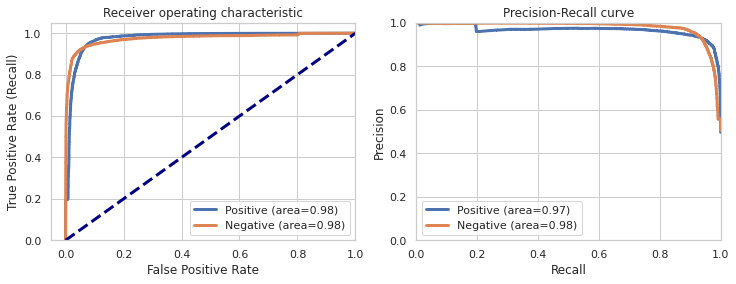

In [ ]:
#@title LogisticRegression_BoW_Model_Eval { vertical-output: true }
if logistic or model_load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))

    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.7 Support Vector Machine

SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data.


<a href="https://ibb.co/c6YSXZ9"><img src="https://i.ibb.co/0CsRV6L/Dim-transofrmation.png" alt="Dim-transofrmation" border="0" /></a>
<a href="https://ibb.co/n1C67wh"><img src="https://i.ibb.co/wQsBSdD/SVM-Img.png" alt="SVM-Img" border="0" /></a>


#### 5.2.7.1 Advantage of SVM
SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables. The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting.
The algorithm creates a hyperplane or line(decision boundary) which separates data into classes. It uses the kernel trick to find the best line separator (decision boundary that has same distance from the boundary point of both classes)

#### 5.2.7.2 Risks using SVM

In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform as we surely do not have linear independent matrix and SVM does not perform very well when the data set has a lot of noise.


In [ ]:
#@title SVM_BoW_Model { vertical-output: true }
if bow_run:
# Linear support vector machine
    if svm:
        start = time.time()
         
        model = LinearSVC(dual=False, tol=tolerance, max_iter=max_iter_runtime)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        bow_calibrated_model = calibrated
        result["BoW_SVM"] = score
        print("Score for Linear support vector machine with fold={} = {} %".format(k_fold, score))
        # CalibratedClassifierCV - 
        # This class uses cross-validation to both estimate the parameters of a classifier and subsequently calibrate a classifier
        # fits a copy of the base estimator to the training subset, and calibrates it using the testing subset      
        end = time.time()
        time_dict["BoW_SVM"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\linear_svc_calibrated.joblib")
else:
    if model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\linear_svc_calibrated.joblib') 

Score for Linear support vector machine with fold=5 = 0.9469250210614996 %


Accuracy:        0.95        
Auc:             0.01             
Detail:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8247
           1       0.97      0.93      0.95      8371

    accuracy                           0.95     16618
   macro avg       0.95      0.95      0.95     16618
weighted avg       0.95      0.95      0.95     16618



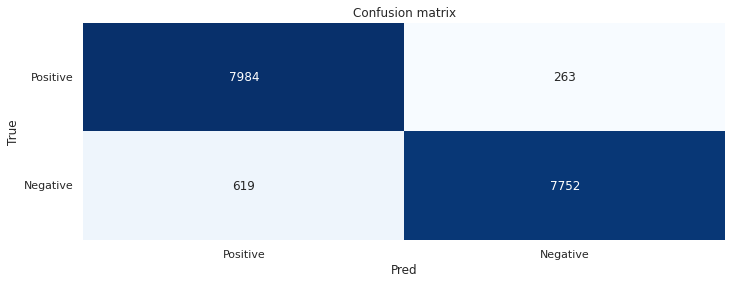

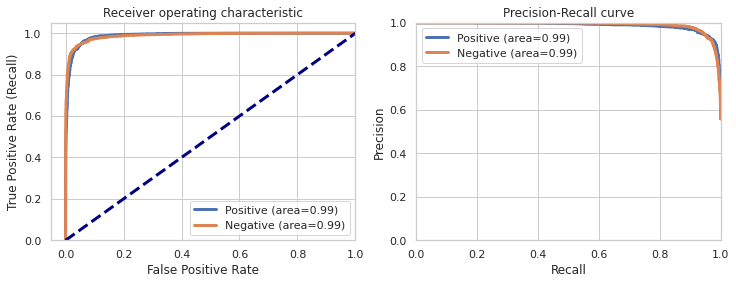

In [ ]:
#@title SVM_BoW_Model_Eval { vertical-output: true }
if svm or model_load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.8 Summary for BoW with tf-idf without SVD

In [ ]:
#@title Time Dict  { vertical-output: true }
print("\t\t\t\t\t Summary for bag of words\n")
print("\t\t\t\t\t    Score \t\t Time  \t\tCost Effective Score\n")
max_i = [0, None]
for key in result:
    if max_i[0]< np.round(result[key]/time_dict[key], 8):
        max_i[0] = np.round(result[key]/time_dict[key], 8)
        max_i[1] = key
    print("{:<30} ---->     {:>10}\t|".format(key, np.round(result[key],5)) + "{:>10} min\t    |".format(np.round(time_dict[key]/60, 3)) + "{:>15}".format(np.round(result[key]/time_dict[key], 8))) 
print("\n\n\t\tBest accuracy")
print("{:<22}: {:>22}".format(max(result), result[max(result)]))
print("\n\t     Cost Effective Score")
print("{:<22}: {:>22}\n".format(max_i[1], max_i[0]))

#### 5.2.8.1 SVM and MultinomialNB are the winners.
After testing our TF-IDF on several learning models we can see that both SVM and MultinomialNB models have over 90% accuracy on our datasets.
Two key observations that differ the models are:
1. SVM reached the highest accuracy
2. MultinomialNB was the fastest, thus it's best for real time


## 5.3 SVD + BoW
Let's try to evaluate the SVD form on the training models. Earlier we created new matrecies with full to -> 3000 dim reduction using SVD. 
It would definity make sense to evaluate SVM but not MultinomialNB on them. 

The reason is Naive Bayes with SVD or other matrix factorization is not such a great idea is:
Naive Bayes based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
Having said that, we shall begin evaluating SVD with SVM, Logistic Reg and RandomForest 
### 5.3.1 SVD & SVM

In [ ]:
#@title SVM_SVD_BoW { vertical-output: true }
if bow_run:
# Linear support vector machine
    if svm and svd:
        start = time.time()
         
        model = LinearSVC(dual=False, tol=tolerance, max_iter=max_iter_runtime)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(svd_bow_X_train, y_train)
        score = calibrated.score(svd_bow_X_test, y_test)
        result["SVD_BoW_SVM"] = score
        print("Score for Linear support vector machine with fold={} = {} %".format(k_fold, score))
        # CalibratedClassifierCV - 
        # This class uses cross-validation to both estimate the parameters of a classifier and subsequently calibrate a classifier
        # fits a copy of the base estimator to the training subset, and calibrates it using the testing subset      
        end = time.time()
        time_dict["SVD_BoW_SVM"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\svd_linear_svc_calibrated.joblib")
else:
    if model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\svd_linear_svc_calibrated.joblib') 

Score for Linear support vector machine with fold=5 = 0.9391623540738958 %


Accuracy:        0.94        
Auc:             0.02             
Detail:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      8247
           1       0.95      0.92      0.94      8371

    accuracy                           0.94     16618
   macro avg       0.94      0.94      0.94     16618
weighted avg       0.94      0.94      0.94     16618



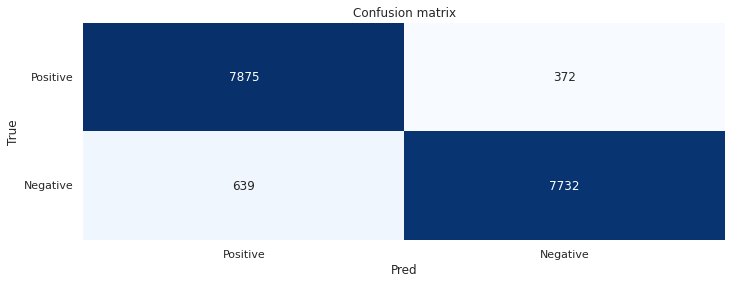

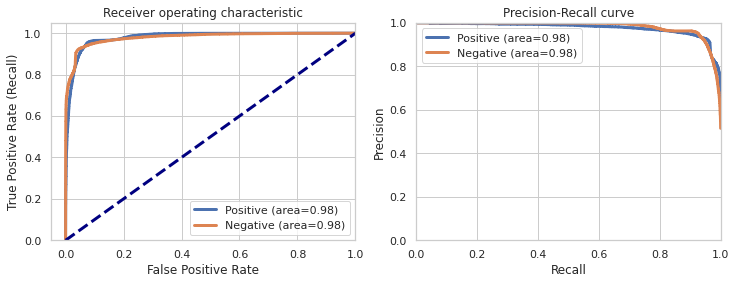

In [ ]:
#@title SVM_SVD_BoW_Evaluation { vertical-output: true }
if (svm and svd) or model_load:
    predicted = calibrated.predict(svd_bow_X_test)
    predicted_prob = calibrated.predict_proba(svd_bow_X_test)

    res1, res2 = map(list, zip(*predicted_prob))
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.3.2 SVD & LogisticRegression

In [ ]:
#@title LogisticRegression_SVD_BoW { vertical-output: true }
if bow_run:
# LogisticRegression
    if logistic and svd:
        start = time.time()
        model = LogisticRegression(max_iter=10000)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(svd_bow_X_train, y_train)
        score = calibrated.score(svd_bow_X_test, y_test)
        svd_bow_calibrated = calibrated
        result["SVD_BoW_LogisticRegression"] = score
        print("Score for LogisticRegression classifier with fold={} > {} %".format(k_fold, score))
        end = time.time()
        time_dict["SVD_BoW_LogisticRegression"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\SVD_BoW_logistic_reg_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\SVD_BoW_logistic_reg_calibrated.joblib') 


Score for LogisticRegression classifier with fold=5 > 0.9305572271031411 %


Accuracy:        0.93        
Auc:             0.02             
Detail:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8247
           1       0.93      0.93      0.93      8371

    accuracy                           0.93     16618
   macro avg       0.93      0.93      0.93     16618
weighted avg       0.93      0.93      0.93     16618



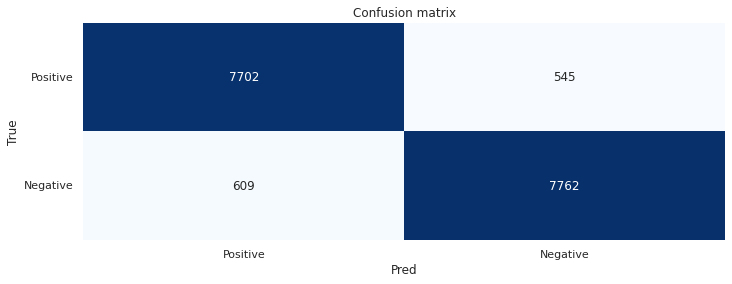

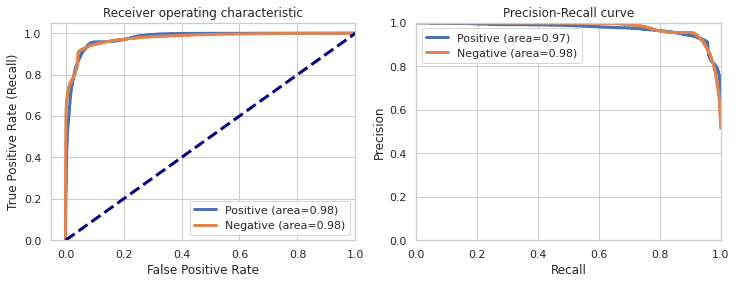

In [ ]:
#@title LogisticRegression_SVD_BoW { vertical-output: true }
if (logistic and svd) or model_load:
    predicted = calibrated.predict(svd_bow_X_test)
    predicted_prob = calibrated.predict_proba(svd_bow_X_test)

    res1, res2 = map(list, zip(*predicted_prob))
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.3.3 SVD & RandomForest

In [ ]:
#@title RandomForest_SVD_BoW { vertical-output: true }
if bow_run:
# RandomForestClassifier
    if random_forest and svd:
        start = time.time()
        model = RandomForestClassifier()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(svd_bow_X_train, y_train)
        score = calibrated.score(svd_bow_X_test, y_test)
        result["SVD_BoW_RandomForest"] = score
        print("Score for RandomForestClassifier classifier with fold={} > {} %".format(k_fold, score))
        end = time.time()
        time_dict["SVD_BoW_RandomForest"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\tfidf\\SVD_BoW_RandomForestClassifier_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\SVD_BoW_RandomForestClassifier_calibrated.joblib') 

Score for RandomForestClassifier classifier with fold=5 > 0.9138885545793718 %


Accuracy:        0.91        
Auc:             0.03             
Detail:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      8247
           1       0.93      0.90      0.91      8371

    accuracy                           0.91     16618
   macro avg       0.91      0.91      0.91     16618
weighted avg       0.91      0.91      0.91     16618



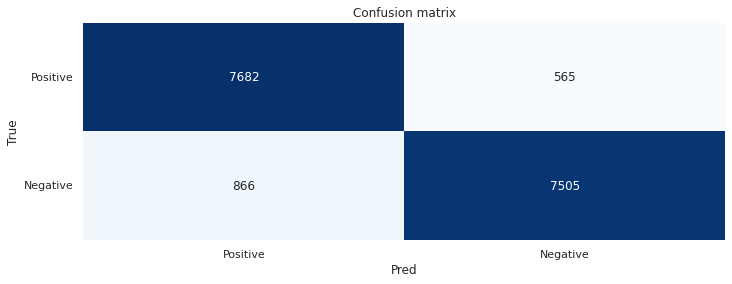

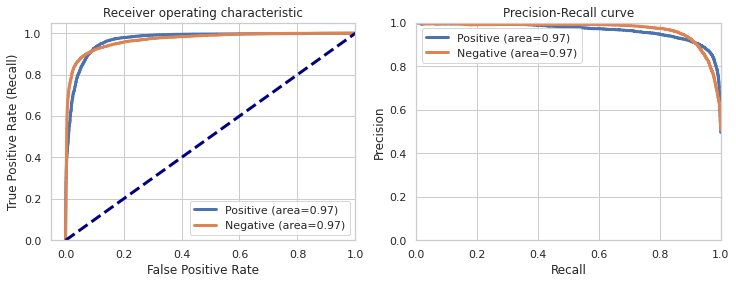

In [ ]:
#@title RandomForest_SVD_BoW_Evaluation { vertical-output: true }
if (random_forest and svd) or model_load:
    predicted = calibrated.predict(svd_bow_X_test)
    predicted_prob = calibrated.predict_proba(svd_bow_X_test)

    res1, res2 = map(list, zip(*predicted_prob))
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.3.4 Summary for BoW with tf-idf with SVD

We see that by implementing SVD on BoW matrix (without NGrams) we managed to reduce the columns dim by a factor of over *10 but still maintain good results.
Also, the models files generated are more compact and hold compressed information. This is all very useful if we need to load them on a remote device. 


In [ ]:
#@title BoW - tfidf
print("\t\t\t\t\t Summary for bag of words\n")
print("\t\t\t\t\t    Score \t\t Time  \t\tCost Effective Score\n")
max_i = [0, None]
for key in result:
    if max_i[0]< np.round(result[key]/time_dict[key], 8):
        max_i[0] = np.round(result[key]/time_dict[key], 8)
        max_i[1] = key
    print("{:<30} ---->     {:>10}\t|".format(key, np.round(result[key],5)) + "{:>10} min\t    |".format(np.round(time_dict[key]/60, 3)) + "{:>15}".format(np.round(result[key]/time_dict[key], 8))) 
print("\n\n\t\tBest accuracy")
print("{:<22}: {:>22}".format(max(result), result[max(result)]))
print("\n\t     Cost Effective Score")
print("{:<22}: {:>22}\n".format(max_i[1], max_i[0]))

					 Summary for bag of words

					    Score 		 Time  		Cost Effective Score

BoW_BernoulliNB                ---->        0.86178	|      0.01 min	    |     1.41148232
BoW_ComplementNB               ---->        0.92971	|     0.009 min	    |     1.81057602
BoW_MultinomialNB              ---->        0.92971	|     0.008 min	    |     1.83206585
BoW_KNeighborsClassifier       ---->        0.71296	|     2.429 min	    |     0.00489128
BoW_DecisionTreeClassifier     ---->          0.924	|     2.107 min	    |     0.00731062
BoW_RandomForest               ---->        0.93429	|    31.061 min	    |     0.00050133
SVD_BoW_SVM                    ---->        0.93916	|     0.563 min	    |     0.02780871
SVD_BoW_LogisticRegression     ---->        0.93056	|     0.451 min	    |     0.03440102
SVD_BoW_RandomForest           ---->        0.91389	|    25.706 min	    |     0.00059253


		Best accuracy
SVD_BoW_SVM           :     0.9391623540738958

	     Cost Effective Score
BoW_MultinomialNB     :   

## 5.4 Random testing 
Now we are ready try to input the model some random string sequences.

In [ ]:
#@title Self testing code { vertical-output: true }
sample_text_a = ["You are shit"]
sample_text_b = ["Fuck"]
sample_text_c = ["I love you"]
sample_text_d = ["Idan is the best teach in the Open University"]
sample_text_e = ["I suck the water outside of the ship"]
sample_text_f = ["I drain the water outside of the ship"]
sample_text_g = ["The data I am using might or might not be refined to be better"]


list_of_samples = [sample_text_a, sample_text_b, sample_text_c, sample_text_d, sample_text_e, sample_text_f, sample_text_g]


def _get_prob(prob):
  return prob[1]

def bow_probability(texts):
  return np.apply_along_axis(_get_prob, 1, bow_calibrated_model.predict_proba(bag_of_words.transform(texts)))  
    
def svd_probability(texts):
  return np.apply_along_axis(_get_prob, 1, svd_bow_calibrated.predict_proba(svd.transform(bag_of_words.transform(texts))))  



print("SVD Model - LogisticRegression")
# Print the result per sample
for sample in list_of_samples:
    #print(np.abs(1-calibrated.predict(svd.transform(sample))), end="")
    prob = svd_probability(sample)
    if prob[0] >= 0.5:
        print("Negative {}%: {}".format(int(np.round(prob[0], 2)*100), sample))
    else:
        print("Positive {}%: {}".format(int(np.round(1-prob[0], 2)*100), sample))
        

print("\n\n\n\nNon SVD Model - SVM")
for sample in list_of_samples:
    #print(np.abs(1-calibrated.predict(svd.transform(sample))), end="")
    prob = bow_probability(sample)
    if prob[0] >= 0.5:
        print("Negative {}%: {}".format(int(np.round(prob[0], 2)*100), sample))
    else:
        print("Positive {}%: {}".format(int(np.round(1-prob[0], 2)*100), sample))        


SVD Model - LogisticRegression
Negative 100%: ['You are shit']
Negative 100%: ['Fuck']
Positive 77%: ['I love you']
Positive 95%: ['Idan is the best teach in the Open University']
Negative 79%: ['I suck the water outside of the ship']
Positive 95%: ['I drain the water outside of the ship']
Negative 64%: ['The data I am using might or might not be refined to be better']




Non SVD Model - SVM
Negative 100%: ['You are shit']
Negative 100%: ['Fuck']
Positive 88%: ['I love you']
Positive 93%: ['Idan is the best teach in the Open University']
Negative 88%: ['I suck the water outside of the ship']
Positive 97%: ['I drain the water outside of the ship']
Positive 66%: ['The data I am using might or might not be refined to be better']


#### 5.4.1 Summary 

1. It can be seen that both methods failed with analyzing "I suck the water outside of the ship".
2. The SVD has slighly less power and fails with the last sentence, but the file weights much less.

# 6. Unsupervised learning

### 6.1 Method 2 - Word2Vec - Continuous bag-of-words (CBoW) 

Continuous bag-of-words (CBoW) is exactly the same as BoW, but instead of using sparse vectors to represent words, it uses dense vectors (continuous distributional "embeddings")



#### 6.1.1 The CBoW and Skip-gram

CBoW predicts the middle word based on surrounding context words. The context consists of a few words before and after our predicted word.

Continuous Skip-gram Model predicts words within a certain range before and after the current word in the same sentence. In some sense, Skip-gram is just the opposite of CBoW. Given a word, we would want to predict the following and preceding likely sequences.

<a href="https://ibb.co/gR7Rk7S"><img src="https://i.ibb.co/pLPLYPf/skipgram-cbow.png" alt="skipgram-cbow" border="0" /></a>

Left  -- CBoW, ---- Prediction of "W" based on (w+n, ..., w-1, w+1, ..., w+n)

Right - SkipGram, Prediction of (w+n, ..., w-1, w+1, ..., w+n) based on "W"


#### 6.1.2 Why CBoW and not BoW

1. BoW models encode every word in the vocabulary as one-hot-encoded vector i.e. for vocabulary of size  |V| , each word is represented by a  |V|  dimensional sparse vector with  1  at index corresponding to the word and  0  at every other index. As vocabulary may potentially run into millions, bag of word models face scalability challenges
2. BoW models don’t respect semantics of the word. For example: words ‘car’ and ‘automobile’ are often used in the same context. However, the vectors corresponding to these words are orthogonal in bag of words model. The problem become more serious while modeling sentences. Ex: “Buy used cars” and “Purchase old automobiles” are represented by orthogonal vectors in BoW model
3. While modeling phrases using BoW the order of words in the phrase is not respected. Ex: “This is good” and “Is this good” have exactly the same vector representation




#### 6.1.3 How does it work

We take the sentence “Computer Science Program” where both “Computer” and “Program” are context words, and “Science” is the target word. We have a shallow network with a single hidden layer.
1. D is the dimension size of the vector we can choose on, based on how dense we want it to be.
2. V is a one-hot encoded vectorsize of (vocabulary / total number of unique words) with only a single 1 per v{i}
3. We randomly initialize Embedding vector(E) with size V * D.
4. We multiply the input one-hot encoded vector with the weights/embedding vector. This gives the embedding vectors for the context words (Natural and processing) of size 1 D

<a href="https://ibb.co/H7Y4Pv8"><img src="https://i.ibb.co/LS6Rgw7/cbow-vector.png" alt="cbow-vector" border="0" /></a>


In the hidden layer, we average the embedding vectors for the context words which forms the input for this layer of size 1 * D. 
This is multiplied by another Vector called Context Vector (E’) with size D * V. 
This gives us a vector of 1 * V which is then passed through a sigmoid function to get the final output


The final output is compared with the one-hot encoded vector of Language (the middle word) [0, 1, 0, ..., 0] and the loss function is calculated. This loss is backpropagated and the model is trained using Gradient Descent.

For Skip-gram, it’s just the opposite way around. 

<a href="https://imgbb.com/"><img src="https://i.ibb.co/74Gw729/skip-gram.png" alt="skip-gram" border="0" /></a>


In both cases, we just keep the Embedding(E) vector at the end.




#### 6.1.4 Complexity 

We will use pretrained word embeddings from the 
Unlike the BoW with the Sparse matrix, CBoW training takes much more time. 
But why should we not learn our own embeddings? Well, learning word embeddings from scratch is a challenging problem due to two primary reasons
Gensim also has a directory of pre-trained embeddings which are 



#### 6.1.5 Impelmentation


In [ ]:
#@title Imports and settings { vertical-output: true }
from gensim.models.word2vec import Word2Vec
from gensim import downloader
from tqdm.notebook import tqdm
import pandas as pd

w2vec = True
w2vec_web = True
w2vec_self = True

##### 6.1.5.1 Word2Vec using pretrained google model 
with 300 dim (features space)

In [ ]:
#@title "word2vec-google-news-300" and embedding function
tokenized = balanced["sentences"].apply(lambda x: x.split())
if w2vec and w2vec_web:
    g_w2v_model = downloader.load("word2vec-google-news-300")
def embedding_feats(list_of_lists, DIMENSION, w2v_model):
        zeros_vector = np.zeros(DIMENSION)
        feats = []
        missing = set()
        missing_sentences = set()
        #Traverse over each sentence
        for tokens in list_of_lists:
            # Initially assign zeroes as the embedding vector for the sentence
            feat_for_this = zeros_vector
            #Count the number of words in the embedding for this sentence
            count_for_this = 0
            #Traverse over each word of a sentence
            for token in tokens:
                #Check if the word is in the embedding vector
                if token in w2v_model:
                    #Add the vector of the word to vector for the sentence
                    feat_for_this += w2v_model[token]
                    count_for_this +=1
                #Else assign the missing word to missing set just to have a look at it
                else:
                    missing.add(token)
            #If no words are found in the embedding for the sentence
            if count_for_this == 0:
                #Assign all zeroes vector for that sentence
                feats.append(feat_for_this)
                #Assign the missing sentence to missing_sentences just to have a look at it
                missing_sentences.add(' '.join(tokens))
            #Else take average of the values of the embedding for each word to get the embedding of the sentence
            else:
                feats.append(feat_for_this/count_for_this)
        return feats, missing, missing_sentences

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
#@title Embedding database  { vertical-output: true }
if w2vec and w2vec_web:
    train_vectors, missing, missing_sentences = embedding_feats(tokenized, 300, g_w2v_model)
    web_word2vec_X_train,web_word2vec_X_test,y_train,y_test=train_test_split(train_vectors,y,test_size=0.2,shuffle=False)

##### Evaluation of W2VEC with SVM 

In [ ]:
#@title SVM_W2VEC { vertical-output: true }
if w2vec and w2vec_web:
# Linear support vector machine
    if svm:
        start = time.time()
         
        model = LinearSVC(dual=False, tol=tolerance, max_iter=max_iter_runtime)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(web_word2vec_X_train, y_train)
        score = calibrated.score(web_word2vec_X_test, y_test)
        g_w2v_calibrated = score 
        result["w2vec_web_svm"] = score
        print("Score for Linear support vector machine with fold={} = {} %".format(k_fold, score))
        # CalibratedClassifierCV - 
        # This class uses cross-validation to both estimate the parameters of a classifier and subsequently calibrate a classifier
        # fits a copy of the base estimator to the training subset, and calibrates it using the testing subset      
        end = time.time()
        time_dict["w2vec_web_svm"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\word2vec\\w2vec_web_svm.joblib")
else:
    if model_load:
        calibrated = load(input_path+'saved_runs\\word2vec\\w2vec_web_svm.joblib') 

Score for Linear support vector machine with fold=5 = 0.6243230232278253 %


Accuracy:        0.62        
Auc:             0.31             
Detail:
              precision    recall  f1-score   support

           0       0.70      0.43      0.53      8247
           1       0.59      0.82      0.69      8371

    accuracy                           0.62     16618
   macro avg       0.64      0.62      0.61     16618
weighted avg       0.64      0.62      0.61     16618



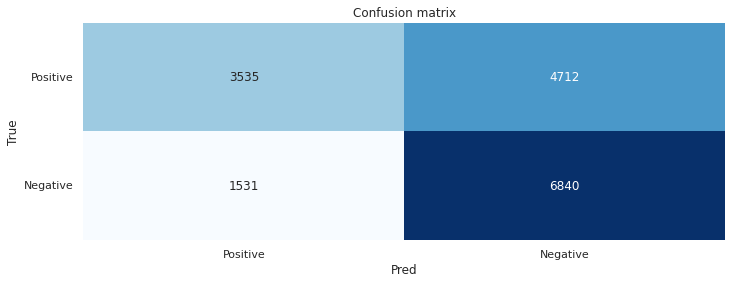

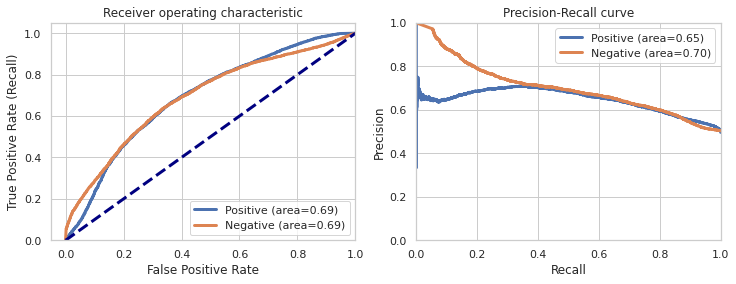

In [ ]:
#@title SVM_W2VEC_Evaluation { vertical-output: true }
if w2vec and w2vec_web and svm:
    predicted = calibrated.predict(web_word2vec_X_test)
    predicted_prob = calibrated.predict_proba(web_word2vec_X_test)

    res1, res2 = map(list, zip(*predicted_prob))
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

##### 6.1.5.2 Word2Vec training new model 
with 1000 dim

In [ ]:
#@title W2V_New_model_training
if w2vec and w2vec_self:
    model_w2v = gensim.models.Word2Vec(
                sentences=tokenized,
                vector_size=1000, # desired no. of features/independent variables
                window=2, # context window size                                 
                sg = 1, # 1 for skip-gram model
                hs = 0,
                negative = 10, # for negative sampling
                workers= max(1, cores-1), # no.of cores
                seed = 34
    ) 

    model_w2v.train(tokenized, total_examples= len(balanced["sentences"]), epochs=20)

* Now we have 1000 features vector, weighted by a SkipGram model, whereas in Bag of Words and TF-IDF we had 1000 features that came from the SVD.

In [ ]:
#@title PCA - to 2 dims
if w2vec and w2vec_self:
    from sklearn.decomposition import IncrementalPCA    # inital reduction
    from sklearn.manifold import TSNE                   # final reduction


    def reduce_dimensions(model):
        num_dimensions = 2  # final num dimensions (2D, 3D, etc)

        vectors = [] # positions in vector space
        labels = [] # keep track of words to label our data again later
        for word in model_w2v.wv.key_to_index:
            vectors.append(model.wv.get_vector(word, norm=True))
            labels.append(word)

        # convert both lists into numpy vectors for reduction
        vectors = np.asarray(vectors)
        labels = np.asarray(labels)

        # reduce using t-SNE
        vectors = np.asarray(vectors)
        tsne = TSNE(n_components=num_dimensions, random_state=0)
        vectors = tsne.fit_transform(vectors)

        x_vals = [v[0] for v in vectors]
        y_vals = [v[1] for v in vectors]
        if num_dimensions>=3:
            z_vals = [v[2] for v in vectors]
        else:
            z_vals = None
        return x_vals, y_vals, z_vals, labels
        
    x_vals, y_vals, z_vals, labels = reduce_dimensions(model_w2v)

#### Drawing the connections on 2D map

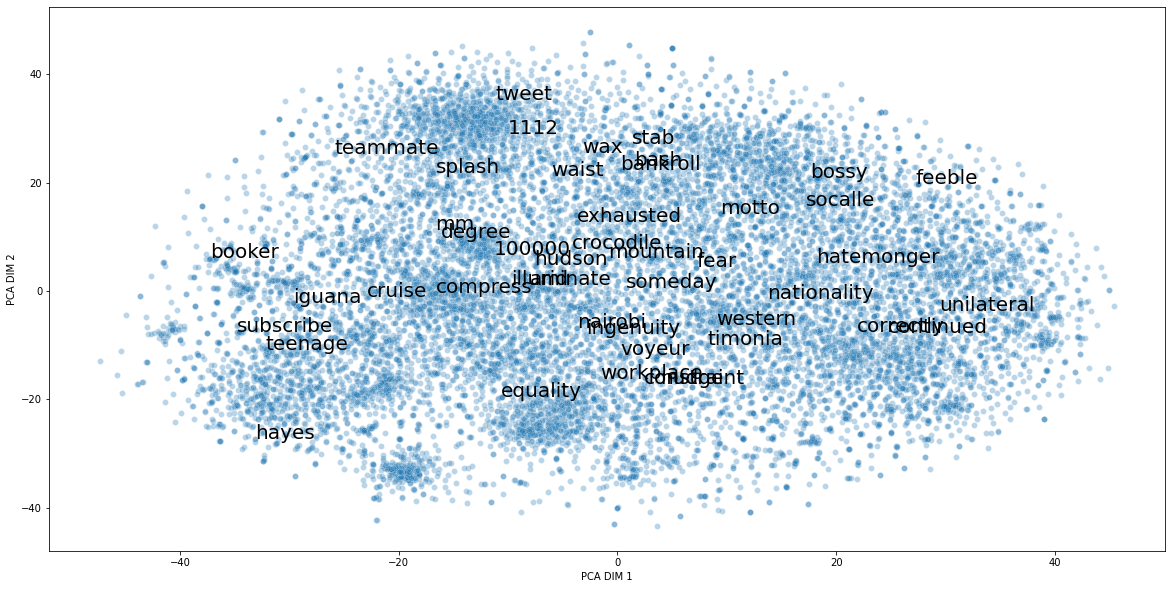

In [ ]:
#@title 2D Connections plotting
if w2vec and w2vec_self:
    def plot_with_matplotlib(x_vals, y_vals, z_vals, labels):
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib.colors import ListedColormap
        import matplotlib.pyplot as plt
        import seaborn as sns
        import random

        random.seed(0)
        figure = plt.figure(figsize=(20, 10))

        if z_vals is not None:
            ax = Axes3D(fig, auto_add_to_figure=False)
            fig.add_axes(ax)

            # get colormap from seaborn
            cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

            # plot
            sc = ax.scatter(x_vals, y_vals, z_vals, s=40, c=x_vals, marker='o', cmap=cmap, alpha=1)
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')

            # legend
            plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
            #
            # Label randomly subsampled 25 data points
            #
            indices = list(range(len(labels)))
            selected_indices = random.sample(indices, 40)
            for i in selected_indices:
                plt.annotate(labels[i], (x_vals[i], y_vals[i]))
        else:
            sns.scatterplot(x=x_vals, y=y_vals, alpha=0.3)
        #
        # Label randomly subsampled 25 data points
        #
            indices = list(range(len(labels)))
            selected_indices = random.sample(indices, 45)
            for i in selected_indices:
                plt.annotate(labels[i], (x_vals[i], y_vals[i]), fontsize=20)

            plt.ylabel("PCA DIM 2")
            plt.xlabel("PCA DIM 1")

    plot_with_matplotlib(x_vals, y_vals, z_vals, labels)

In [ ]:
#@title Embeddings
#word_vectors = model.wv
if w2vec and w2vec_self:
    train_vectors, missing, missing_sentences = embedding_feats(tokenized, 1000, model_w2v.wv)
    self_word2vec_X_train,self_word2vec_X_test,y_train,y_test=train_test_split(train_vectors,y,test_size=0.2,shuffle=False)

#### Evaluating RandomForest

#### Evaluating SVM

In [ ]:
#@title SVM_W2V_Self { vertical-output: true }
if w2vec and w2vec_self:
# Linear support vector machine
    if svm:
        start = time.time()
         
        model = LinearSVC(dual=False, tol=tolerance, max_iter=max_iter_runtime)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(self_word2vec_X_train, y_train)
        score = calibrated.score(self_word2vec_X_test, y_test)
        result["w2vec_self_svm"] = score
        print("Score for Linear support vector machine with fold={} = {} %".format(k_fold, score))
        # CalibratedClassifierCV - 
        # This class uses cross-validation to both estimate the parameters of a classifier and subsequently calibrate a classifier
        # fits a copy of the base estimator to the training subset, and calibrates it using the testing subset      
        end = time.time()
        time_dict["w2vec_self_svm"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\word2vec\\w2vec_self_svm.joblib")
else:
    if model_load:
        calibrated = load(input_path+'saved_runs\\word2vec\\w2vec_self_svm.joblib') 

Score for Linear support vector machine with fold=5 = 0.5889825406381698 %


#### Evaluating Logistic Regression

In [ ]:
#@title LogisticRegression_W2V_Self { vertical-output: true }
if w2vec and w2vec_self:
# LogisticRegression
    if logistic:
        start = time.time()
        model = LogisticRegression(max_iter=10000)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(self_word2vec_X_train, y_train)
        score = calibrated.score(self_word2vec_X_test, y_test)
        w2v_calibrated = calibrated
        result["w2vec_self_LogisticRegression"] = score
        print("Score for LogisticRegression classifier with fold={} > {} %".format(k_fold, score))
        end = time.time()
        time_dict["w2vec_self_LogisticRegression"] = end - start
        if save:
            dump(calibrated, output_path+"saved_runs\\word2vec\\w2vec_self_logistic_reg_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\word2vec\\w2vec_self_reg_calibrated.joblib') 


Score for LogisticRegression classifier with fold=5 > 0.6218543046357616 %


Accuracy:        0.62        
Auc:             0.32             
Detail:
              precision    recall  f1-score   support

           0       0.68      0.47      0.56      8319
           1       0.59      0.77      0.67      8291

    accuracy                           0.62     16610
   macro avg       0.63      0.62      0.61     16610
weighted avg       0.63      0.62      0.61     16610



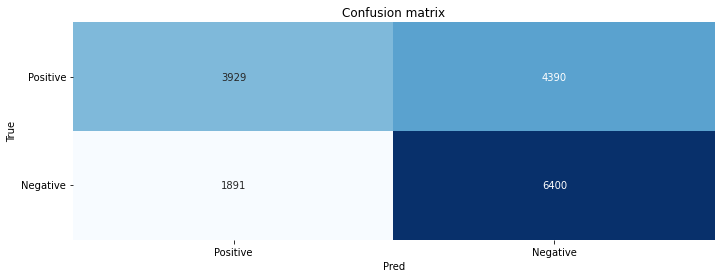

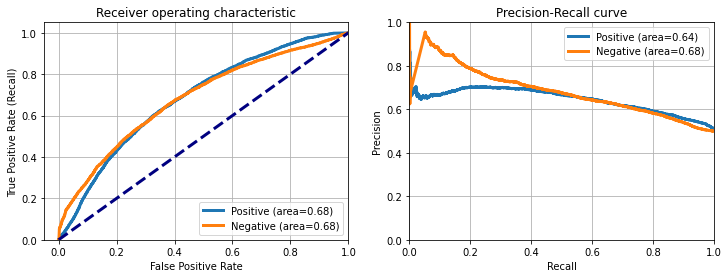

In [ ]:
#@title LogisticRegression_W2V_Self_Eval { vertical-output: true }
y_test_array = pd.get_dummies(y_test, drop_first=False).values
import seaborn as sns
if w2vec and w2vec_web and svm:
    predicted = calibrated.predict(self_word2vec_X_test)
    predicted_prob = calibrated.predict_proba(self_word2vec_X_test)

    res1, res2 = map(list, zip(*predicted_prob))
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

#### 6.1.6 W2VEC Summary

We see that our score is slighly low her. It makes sense as our model is evaluated based on our own learning data. 
This model might have been better (and it is) if we simply implement a bigger learn database (for evaluation, not for the embeddings).

## 6.2 Method 3 - ELMO

Deep contextualized word representation
    
ELMO uses word vectors that are learned functions of the internal states of a deep bidirectional language model (biLM) pretrained on a large text corpus.
The representations can be further added to existing models in any downstream tasks and also significantly improve SOTA across most challenging NLP problems
 
The vectors are in particular modelled using both:     
1. Syntaxical and semantical characteristics of word
2. How use of these characteristics vary across linguistic contexts

ELMo language model is designed using a deep bidirectional LSTM language model for learning words and their context. The deep BiLSTM architecture allows ELMo to learn more context-dependent aspects of word meanings in the higher layers along with syntax aspects in lower layers. This results in better word embeddings, and different representations of a word depending on the context it appears in (especially useful for homographs).

### 6.2.1 Advantages of ELMo emebeddings:
1. ELMo vectors can be utilized in any NLP task directly as features or as a embedding layer and this typically results in vast gains in performance comapred to traditional NLP and ML models.
2. ELMo vectors are trained using a large scale language model seeks to compute the probability of a word, given some prior history of words seen. This allow to utilize the context of the word in the sentence to build the entire sentence embedding.
 - Example: Apple in 'Apple is the best smartphone out there' vs. 'Eating apple a day keeps the doctor away' gets different representation as the full sentence is used to build the embeedings.
3. ELMo language model is trained on a sizable dataset (1B Word Benchmark) with large-scale LSTM layers containing 4096 units & input embedding transform using 2048 convolutional filters which resulted in rich representations.
4. Elmo is based on character level embeddings using character convolutions and can handle out of vocabulary words.

### 6.2.2 Risks of using ELMo emebeddings in NLP tasks:
1. Need to Ffne tune the word vectors for downstream tasks
2. Hyper-param tuning the down stream models for NLP task at hand 
3. Computationally intensive and not easier to exaplain the predictions


<a href="https://ibb.co/G0tqp0y"><img src="https://i.ibb.co/80dHs0q/ELMO-architecture.png" alt="ELMO-architecture" border="0" /></a>

### 6.2.3 Implementation

In [ ]:
#@title Init
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import random, gc
from tqdm import tqdm
import re, time, pickle
import tensorflow as tf 
import numpy as np
import os,sys
import tensorflow_hub as hub 
import tensorflow.compat.v1 as tf1
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
from cachetools import TTLCache,cached
from sklearn import metrics, preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

                   # final reduction


if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else: 
    print("Please install GPU version of TF")

def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf1.set_random_seed(seed)
    
seed_everything(2047)
tf1.disable_eager_execution()
tf1.disable_v2_behavior()

def encode(le, labels):
    # Encoding output labels in keras long format for loss compatability
    enc = le.transform(labels)
    return tf.keras.utils.to_categorical(enc)

def decode(le, one_hot):
    # Decoding the keras encoded labels back 
    dec = np.argmax(one_hot, axis=1)
    return le.inverse_transform(dec)

def compute_metrics_v1(y_t,y_p):  
    # Helper function for computing metrics on the dataset
    accuracy = accuracy_score(y_true=y_t,y_pred=y_p)
    recall = recall_score(y_true=y_t,y_pred=y_p)
    precision = precision_score(y_true=y_t,y_pred=y_p)
    f1 = f1_score(y_true=y_t,y_pred=y_p)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1} 

def plot_model_history(model,model_name,skip_start:int=5,skip_end:int=1,metrics=['loss'],freq=1):
    # This function can be used to plot train vs validation losses as model training is done
    # If the nbr_epochs are less (<10), callbacks can be implemented and plotted suitably for a sample epoch run
    skip_end = skip_end if skip_end > 0 else 1
    fig, ax = plt.subplots(1,len(metrics),figsize=(15,4.25))
    fig.suptitle('Training history for '+model_name, fontsize=14)
    for i,metric in enumerate(metrics):
        
        losses = model.history.history[metric]
        val_losses = model.history.history['val_'+metric]
        lrs = range(len(losses))[skip_start:-skip_end]

        axis = ax if len(metrics) == 1 else ax[i]
        axis.plot(lrs,losses[skip_start:-skip_end])
        axis.plot(lrs,val_losses[skip_start:-skip_end])
        ax.set_xticks(ax.get_xticks()[::freq])
        axis.set_ylabel(metric)
        axis.set_xlabel('epoch')
        axis.legend(['train', 'test'], loc='upper left')

# Ingest and process data
#balanced = pd.read_csv("../input/input-files/balanced.csv") 
df = balanced.rename(columns={'sentences':'sentence','Negative':'label'})

# Encode the labels for binary loss function 
x = list(df['sentence'])
y = list(df['label'])

le = preprocessing.LabelEncoder()
le.fit(y)

x_enc = x
y_enc = encode(le, y)

# Train test (20%) split
x_train, x_test, y_train, y_test = train_test_split(np.asarray(x_enc), np.asarray(y_enc), test_size=0.2, shuffle=False)

### 6.2.4 Visualize sample ELMo word vectors and projections

Let us see here the various properties of elmo mentioned above. We shall extract the word vectors for each word for a few sample positive and negative sentences and visualise the initial few vectors (elmo vectors has 1024 dimensionality which is a little difficult to show) and late summarise the entire dimensional space using a suitable dimensional reduction technique.

In [ ]:
#@title 100*2 samples for visualization { vertical-output: true }
embed = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
def elmo_vectors(x):
    embeddings = embed(x.tolist(), signature="default", as_dict=True)["elmo"]

    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        sess.run(tf.compat.v1.tables_initializer())
        # return average of ELMo features
        return sess.run(tf.reduce_mean(embeddings,1))

pos_idx_vis = df[df.label==1].sample(n=100).index.values
neg_idx_vis = df[df.label==0].sample(n=100).index.values

# list_train = [train[i:i+100] for i in range(0,train.shape[0],100)]
# list_test = [test[i:i+100] for i in range(0,test.shape[0],100)]

# elmo_train = [elmo_vectors(df['setence']) for x in list_train]
# elmo_test = [elmo_vectors(df['sentence']) for x in list_test]

# elmo_train_new = np.concatenate(elmo_train, axis = 0)
# elmo_test_new = np.concatenate(elmo_test, axis = 0)

pos_sentences_vec = elmo_vectors(df[df.index.isin(pos_idx_vis)]['sentence'])
neg_sentences_vec = elmo_vectors(df[df.index.isin(neg_idx_vis)]['sentence'])

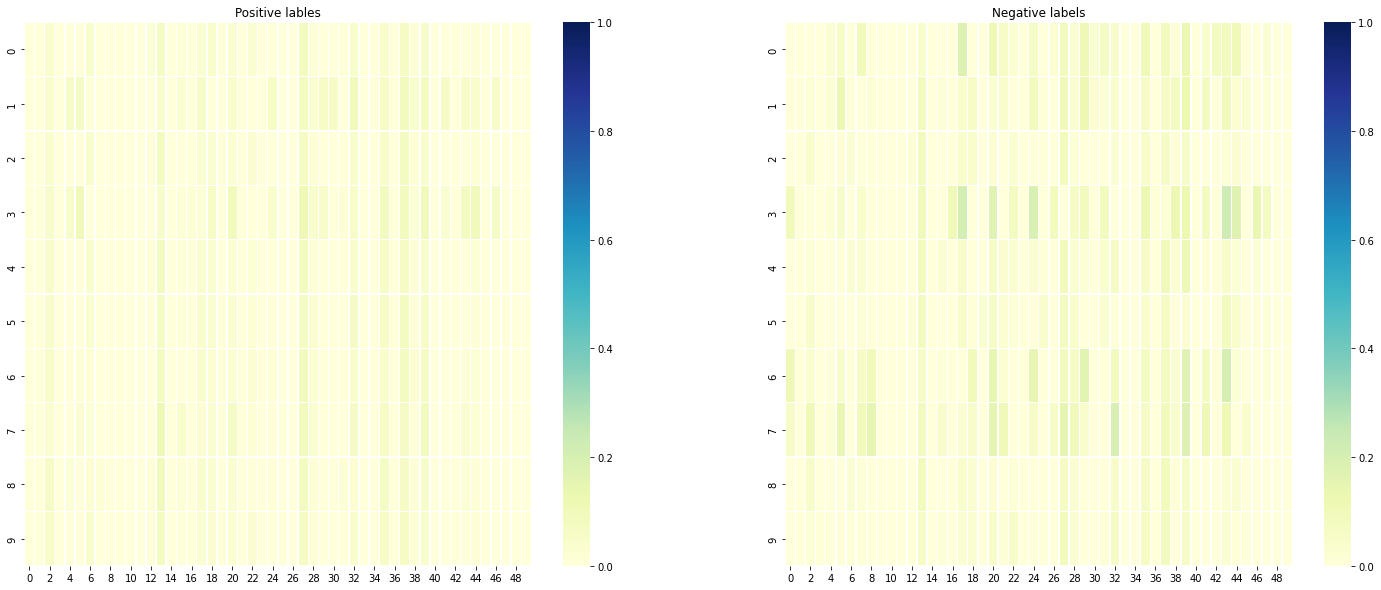

In [ ]:
#@title Labels plotting { vertical-output: true }
fig, ax = plt.subplots(1,2,figsize=(25,10))       
sns.heatmap(pos_sentences_vec[:10,:50], vmin=0, vmax=1,linewidths=.5,cmap="YlGnBu",ax=ax[0]);
sns.heatmap(neg_sentences_vec[:10,:50], vmin=0, vmax=1,linewidths=.5,cmap="YlGnBu",ax=ax[1]);
ax[0].set_title('Positive lables');
ax[1].set_title('Negative labels');
plt.show();

### 6.2.5 Visualizing dimensional space with tSNE

t-SNE is a tool to visualize high-dimensional data, it converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
When compared to PCA, PCA can be used for dense data or TruncatedSVD for sparse data to reduce the number of dimensions to a reasonable amount when # features is very high. For visualizing tSNE is preferred rather tha reduction for new data
In the below plot each scatter plot point is an example, colour of the plots shows if it is a positive or negative sample. From the tSNE, I have tried to reduce the 1024 dimensions into 2 and plot them, x axis shows first dimension and y axis the second dimensions. I have only plotted 100 examples each for class as it is computatinally intensive to extract the word vectors.
Even for the 200 examples, we can see that it has good separation between the two classes based on the elmo vectors which confirms out intuition that pre-trained word patterns from the sentence can be utilized to model the positive vs. negative polarity space.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


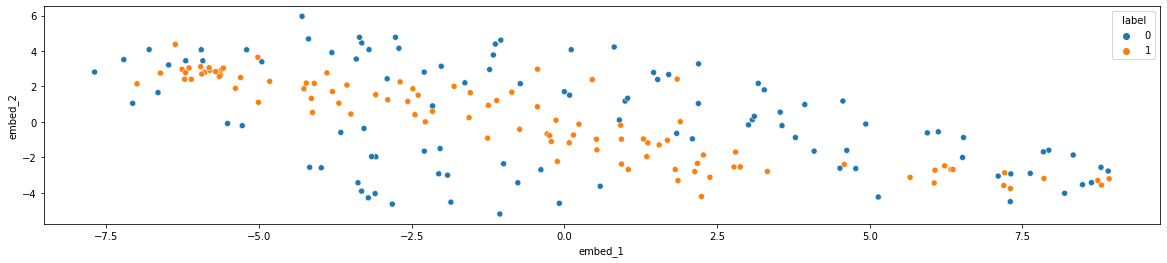

In [ ]:
#@title 2D Reduction
def get_tsne(X,n_comp=2,n_iter=1000,verbose=0,seed=2047):
    tsne = TSNE(n_components=n_comp, n_iter=n_iter, verbose=verbose, random_state=seed)
    tsne_embed = tsne.fit_transform(X.astype(np.float32))
    projection = pd.DataFrame(columns=['embed_1', 'embed_2'], data=tsne_embed) 
    return projection

plt.figure(figsize=(20, 4))
elmo_vector_projection = get_tsne(np.concatenate([pos_sentences_vec,neg_sentences_vec]),n_iter=1000)
elmo_vector_projection['label'] = list(df[df.index.isin(pos_idx_vis)]['label'])+list(df[df.index.isin(neg_idx_vis)]['label'])



sns.scatterplot(data=elmo_vector_projection, x="embed_1", y="embed_2", hue="label")
fig.show();

### TensorFlow(Keras) Multilayer Perceptron forward network model with fully connected layers

<a href="https://imgbb.com/"><img src="https://i.ibb.co/2qXNwv0/neural-layers.png" alt="neural-layers" border="0" /></a>



- We are writing a function that can combine elmo embeddings by taking mean of individual dimenions, then create a MLP model using tensorflow keras that takes the words as input layer and create an embedding layer on top of this which uses the embedding function and create the dense layers on top of this.

- I've chosen to keep the model architecture simple (2 fully connected dense layers with 64, 32 units, followed by an output layer with sigmoid actiavtion which can translate output to probabilities for each class) as the number of examples are not large. I've experiment with the model architecture and this combination sensible as the total parameters closely matches number of training samples to learn the parameters to be able to generalize well.  
- We can also see a summary of the model at the end of execution of following cell

In [ ]:
#@title google-elmo-2 embeddings
# Get ElMo embeddings as the input layer and build the MLP on top of it for classification

embed = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
def ELMoEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

def get_elmo_mlp_model(params={}):
    
    szs = params.get('szs',[64,32])
    drop_trainable = params.get('drop_trainable',False)
    drops = params.get('drops',[0.1,0.1])
    bilstm = params.get('bilstm',None)
    n_label = params.get('n_label',2)
    act_out = params.get('act_out','softmax')
    reg_dense = params.get('reg_dense',None)
    h_reg = tf.keras.regularizers.L2(l2=0.01) if reg_dense is True else None
        
    # Build input, outputs, build the model and compile losees
    x = None
    input_text = tf.keras.layers.Input(shape=(1,), dtype='string',name='input_text')
    embedding = tf.keras.layers.Lambda(ELMoEmbedding,output_shape = (1024,), name = 'elmo_embedding')(input_text)
    
    if x is None: x = embedding
    if bilstm is True:
        x = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(1024,
                 return_sequences=False,
                 recurrent_dropout=0,
                 dropout=0,
                 name="BiLSTM"))(x)
    
    for i,sz in enumerate(szs):
        x = tf.keras.layers.Dense(
            sz,
            activation='relu',
            kernel_initializer='glorot_uniform',
            kernel_regularizer=h_reg)(x)
        if drop_trainable is True: 
            x = tf.keras.layers.Dropout(drops[i])(x)

#     x = tf.keras.layers.Dense(64,activation='relu')(embedding)
#     x = tf.keras.layers.Dense(32,activation='relu')(x)
    predictions = tf.keras.layers.Dense(n_label,activation=act_out)(x)
    model = tf.keras.Model(inputs = [input_text],outputs = predictions)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model = get_elmo_mlp_model()
model.summary()

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(tf.compat.v1.tables_initializer())
    history = model.fit(
        x_train,
        y_train,
        validation_data=(x_test,y_test),
        epochs=1,
        batch_size=32)
    model.save_weights(output_path+"saved_runs\\word2vec\\" + "elmo-mlp-model_soft.h5")
    
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(tf.compat.v1.tables_initializer())
    model.load_weights(output_path+"saved_runs\\word2vec\\" + "elmo-mlp-model_soft.h5")
    predicts = model.predict(x_test, batch_size=32)
    

                       
                       


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      [(None, 1)]               0         
_________________________________________________________________
elmo_embedding (Lambda)      (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 67,746
Trainable params: 67,746
Non-trainable params: 0
_________________________________________________________________
Train on 66439 samples, validate on 16610 samples
66439/66439 [==============================] - ETA: 0s - loss: 0.2305 - a

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


66439/66439 [==============================] - 1686s 25ms/sample - loss: 0.2305 - acc: 0.9078 - val_loss: 0.2763 - val_acc: 0.8920


(16610, 2)
(16610,)
(16610,)
[[8034  285]
 [1517 6774]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      8319
           1       0.96      0.82      0.88      8291

    accuracy                           0.89     16610
   macro avg       0.90      0.89      0.89     16610
weighted avg       0.90      0.89      0.89     16610

Accuracy of ELMO MLP is: 0.8915111378687538



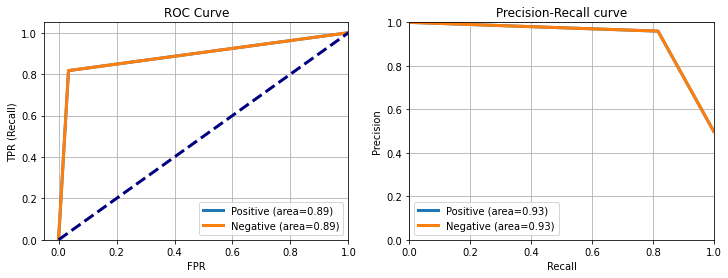

In [ ]:
#@title Plotting the results { vertical-output: true }
y_test_d = decode(le, y_test)
y_preds_d = decode(le, predicts)

print(predicts.shape)
print(y_test_d.shape)
print(y_preds_d.shape)

print(metrics.confusion_matrix(y_test_d, y_preds_d))
print(metrics.classification_report(y_test_d, y_preds_d))
print("Accuracy of ELMO MLP is:",accuracy_score(y_test_d,y_preds_d))
fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_d, y_preds_d)
    ax[0].plot(
        fpr, tpr, lw=3,label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr)) )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='FPR',ylabel="TPR (Recall)", title="ROC Curve")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(y_test_d, y_preds_d)
    ax[1].plot(
        recall, precision, lw=3,
        label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(recall, precision)) )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.gcf().set_size_inches(12, 4)
plt.xlim(0, 1)
plt.ylim(0, 1)
print("")

In [ ]:
#@title Freestyle evaluation  { vertical-output: true }
test_texts = [
    "You are shit",
    "Fuck",
    "I love you",
    "Idan is the best teach in the Open University",
    "I suck the water outside of the ship",
    "I drain the water outside of the ship",
    "The data I am using might or might not be refined to be better"]

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(tf.compat.v1.tables_initializer())
    model.load_weights(output_path+"saved_runs\\word2vec\\" + "elmo-mlp-model_soft.h5")
    predicts = model.predict(np.array(test_texts), batch_size=32)

## 6.3 Method 4 - BERT

BERT is Bidirectional Encoder Representations from Transformers)
- Bert model builds on top of bidirectional idea from ELMo, but uses the relatively new transformer architecture to compute word embeddings. It has been shown to produce excellent word embeddings, achieving state-of-the-art results on various NLP tasks.  
- BERT also builds on top of a number of clever ideas bubbling up in NLP community recently like, Semi-supervised Sequence Learning, ELMo, ULMFiT, OpenAI transformer & Transformers (Vaswani et al).

### 6.3.1 Transformers

- Transformer in NLP is a novel architecture that aims to solve sequence-to-sequence tasks while handling long-range dependencies with ease. The idea behind Transformer is to handle the dependencies between input and output with attention and recurrence completely.
- It is the first transduction model relying entirely on self-attention to compute representations of its input and output without using sequence-aligned RNNs or convolution. Transduction is the conversion of input sequences into output sequences. 
- Transformer's SOTA achieved results on tasks such as machine translation started to make some in the field think of them as a replacement to LSTMs, as they also deal with long-term dependancies better than LSTMs.
- Encoder-Decoder structure of transformer made it perfect for machine translation and downstream tasks such as sentence classification with some fine-tuning utilizing a pre-trained models.

<a href="https://ibb.co/vvvj88Q"><img src="https://i.ibb.co/JFFsPPy/transformer-diag.png" alt="transformer-diag" border="0" /></a>

### 6.3.2 Tokenization 
- Tokenization: Breaking a word down into one or more sub-words referenced in the model vocabulary. Transformers models in general, and BERT and DistilBERT in particular, use tokenization.
- Example: the sentence “My name is Marisha” is tokenized into [CLS] My name is Maris ##ha [SEP], which is represented by the vector [101, 1422, 1271, 1110, 27859, 2328, 102].
- Hugging Face provides a series of pre-trained tokenizers for different models. I've used the pretrained DistilBERT tokenizer for the task.
- Same tokenizer is used to tokenize the training and testing datasets and converted them to huggingface dataset format and then back to PyTorch tensor format used during training.

### 6.3.3 BERT for sentence classification 
- We have built a senetence classifier model utilizing distillbert that has near identical peroformance on almost all the NLP tasks with less computation power usage. The dataset is processed, tokenized and pre-trained model is loaded and a custom layer is built on top of pre-trained model for further fine tuning and evaluation.
- Utility of fine tuning: The word vectors from pre-trained BERT models give contexual representations that are tailored for generic context and NLP task at hand. With fine tuning, the vocabulary in the custom dataset can be updated based on output layer activations. This helps in better handling of the supervised classifications.

<a href="https://ibb.co/y5L6mVM"><img src="https://i.ibb.co/hHpBxCn/Bert-architecture-diagram.png" alt="Bert-architecture-diagram" border="0" /></a>



### 6.3.4 Implementation

In [ ]:
#@title Imports and configurations { vertical-output: true }
import os, sys
import pandas as df
import numpy as np
import warnings
import transformers # 
import torch
import random, gc
import pandas as pd
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
from transformers import AutoTokenizer, TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig
from datasets import load_dataset, load_metric, Dataset
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(transformers.__version__)

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything(2047)
transformers.set_seed(2047)

def compute_metrics_v1(p): 
    # Custom metric function to feed into sentence classfier model: This function is for model
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1} 

def compute_metrics_v2(y_t,y_p):    
    # Generic version of metric function for evaluatiuon: Outside of model
    accuracy = accuracy_score(y_true=y_t,y_pred=y_p)
    recall = recall_score(y_true=y_t,y_pred=y_p)
    precision = precision_score(y_true=y_t,y_pred=y_p)
    f1 = f1_score(y_true=y_t,y_pred=y_p)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1} 




4.11.3
There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
#@title Loading and encoding { vertical-output: true }
def encode_text(df): 
    # Pre-trained huggingface auto tokenizer 
    return tokenizer(df['sentence'], truncation=True, padding=True)

# Ingest and process data
#  Change the location of balanced.csv to path on disk

balanced = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/output/database/balanced.csv") 
df = balanced.rename(columns={'sentences':'sentence','Negative':'label'})
display(df.head)
print(df.shape)

# Bert Tokenizer and pre-trained model
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
metric = load_metric("accuracy")

In [ ]:
dataset = Dataset.from_pandas(df[['sentence','label']])
encoded_dataset = dataset.map(encode_text,batched=True,load_from_cache_file=False)

  0%|          | 0/84 [00:00<?, ?ba/s]

#### 6.3.4.1 Split and format conversion 

- Test set is kept to 20% of the overall data like other models and rest for train, 10% of the train is separated to validate set to see the performance during the model traininga and having test set as complete holdout for evaluation. We do this step as we are fine-tuning the distillbert model also to our dataset for fitting to intricacies of the dataset and having a validation set helps if we need to hyperparamter tune and evaluating overfit in the model.

- After the split, we convert the data sets back to tensor formats which is needed for model building and evaluaion.

In [ ]:
#@title Converting to torch format { vertical-output: true }
# Train, valid, test split 
test_sz = 0.2
valid_sz = 0.1

test_idx = df.sample(frac=test_sz,random_state=2047).index
valid_idx = df.loc[~df.index.isin(test_idx)].sample(frac=valid_sz,random_state=2047).index
train_idx = df.loc[(~df.index.isin(test_idx))&(~df.index.isin(valid_idx))].index

train_frame = Dataset.from_pandas(pd.DataFrame.from_dict(encoded_dataset[list(train_idx.values)]))
valid_frame = Dataset.from_pandas(pd.DataFrame.from_dict(encoded_dataset[list(valid_idx.values)]))
test_frame = Dataset.from_pandas(pd.DataFrame.from_dict(encoded_dataset[list(test_idx.values)]))

# COnvert to torch format 
columns_to_return = ['input_ids', 'label', 'attention_mask']
train_frame.set_format(type='torch', columns=columns_to_return)
valid_frame.set_format(type='torch', columns=columns_to_return)
test_frame.set_format(type='torch', columns=columns_to_return)

#### 6.3.4.2 Model building

- Fine tune the bert model and train a sentence classifier, either of auto model / pre-trained modules can be utilized.  
- Training for longer epochs is taking amount of time with minimal gains, hence restricted to one epoch (giving near 90% accuracies).  
- Model can be further hyper-parameter tuned for enchancements.

In [ ]:
#@title Model building { vertical-output: true }
#!pip install bertviz
from bertviz import head_view, model_view
from transformers import DistilBertModel, DistilBertTokenizer

def show_head_view(model, tokenizer, text):
    inputs = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True)
    input_ids = inputs['input_ids']
    attention = model(input_ids)[-1]
    input_id_list = input_ids[0].tolist() # Batch index 0
    tokens = tokenizer.convert_ids_to_tokens(input_id_list)
    head_view(attention, tokens)
    
def show_model_view(model, tokenizer, text):
    inputs = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True)
    input_ids = inputs['input_ids']
    attention = model(input_ids)[-1]
    input_id_list = input_ids[0].tolist() # Batch index 0
    tokens = tokenizer.convert_ids_to_tokens(input_id_list)
    model_view(attention, tokens)
    
    
model_version = 'distilbert-base-uncased'
do_lower_case = True
model = DistilBertModel.from_pretrained(model_version, output_attentions=True)
tokenizer = DistilBertTokenizer.from_pretrained(model_version, do_lower_case=do_lower_case)

#### 6.3.4.3 Visualizing attention patterns produced by one or more attention heads in a given transformer layer
- Understanding the attention view: The following attention-head view visualizes the attention patterns produced by attention heads in a given transformer layer (select from the filter). Here self-attention is represented as lines connecting the tokens that are attending (left) with the tokens being attended to (right). Colors identify the corresponding attention head(s), while line weight reflects the attention score.
- We can select the layer and one or more attention heads (represented by the colored patches), and can also filter attention by token, the target tokens are highlighted and shaded based on attention strength
- For the distilbert model, I have selected Sentence A and Sentence B filter, which only shows attention from tokens in Sentence A to tokens in Sentence B for a positive example
- I've selected a negative label and when the later layer is selected (layer 3) is selected, it shows how the model is combining all the other negative words in both forward and backward layers. This gives us a clear intuition as to how there will be a different represenation and sentence pair patterns for negative and positive words which will potentiallty be later used for making classifier.
- We can play with any example simialrly and look at the attention heads in explained how a word vector for positive or negative words and whole sentences are created.

In [ ]:
show_head_view(model, tokenizer, df.iloc[10].sentence)

<IPython.core.display.Javascript object>

#### 6.3.4.4 Birds-eye view of attention across all of the model’s layers and heads for a sample example

- The model view below provides a birds-eye view of attention across all of the model’s layers and heads for a particular input. Attention heads are presented in tabular form, with rows representing layers and columns representing heads. Each layer/head is visualized in a thumbnail form conveys the coarse shape of the attention pattern, following the small multiples design pattern. Users may also click on any head to enlarge it and see the tokens. 
- The model view enables users to browse the attention heads across all layers in the model and see how attention patterns evolve throughout the model. For example, one can see that many attention heads in the initial layers tend to be position-based, e.g. focusing on the same token (layer 0, head 1) or focusing on the previous token (layer 2, head 2) for the selected negative sample from above. It can be seent that a negative word like shit and dummb are attending each other in the middle layers.

In [ ]:
show_model_view(model, tokenizer, df.iloc[10].sentence)

<IPython.core.display.Javascript object>

#### 6.3.4.5 Declare model params and instantiate the model

Similar to elmo mlp model we are using a batch size of 32 and training the model for 1 epoch.

In [ ]:
#@title Model and params { vertical-output: true }
# Model params 
train_batch_sz = 32
eval_batch_sz = 32
metric_name = "accuracy"
model_name = model_checkpoint.split("/")[-1]
n_sz_max_word = df['Number of words'].max()
num_labels = 2

# model = TFDistilBertForSequenceClassification.from_pretrained(
#     model_checkpoint,
#     output_hidden_states=False,
#     output_attentions=False,
#     num_labels=num_labels)
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels)
args = TrainingArguments(
    f"{model_name}-finetuned",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=train_batch_sz,
    per_device_eval_batch_size=eval_batch_sz,
    num_train_epochs=1,
    weight_decay=0.01,
    warmup_steps=500,             
    logging_dir='./logs',            
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
#     push_to_hub=False
)

trainer = Trainer(
    model,
    args,
    train_dataset=train_frame,
    eval_dataset=valid_frame,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics_v1
)

#### 6.3.4.6 Model train and evaluation

- After the model training and metrics, it can be seen the model is generalizing well and giving an accuracy of more than 90, this can be expected as we have fine tuned the distillbert model for our dataset and fitted a classifier on top of these vectors.
- As bert models are built on top of ideas borrowed from both elmo and transformers, the performance is intuitive. 

In [ ]:
trainer.train()
trainer.evaluate()

torch.cuda.empty_cache()
gc.collect()

The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence.
***** Running training *****
  Num examples = 59795
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1869


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 6644
  Batch size = 32
Saving model checkpoint to distilbert-base-uncased-finetuned/checkpoint-1869
Configuration saved in distilbert-base-uncased-finetuned/checkpoint-1869/config.json
Model weights saved in distilbert-base-uncased-finetuned/checkpoint-1869/pytorch_model.bin
tokenizer config file saved in distilbert-base-uncased-finetuned/checkpoint-1869/tokenizer_config.json
Special tokens file saved in distilbert-base-uncased-finetuned/checkpoint-1869/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from distilbert-base-uncased-finetuned/checkpoint-1869 (score: 0.9598133654425045).
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassificati

51

In [ ]:
#@title # Evalaute predictions { vertical-output: true }
# Evalaute predictions
test_preds = trainer.predict(test_frame)

test_preds_p = pd.DataFrame(test_preds.predictions)
test_preds_p['pred'] = np.argmax(test_preds_p.values, axis=1)
test_preds_p['label'] = list(test_preds.label_ids)

test_met = compute_metrics_v2(test_preds_p['label'].values,test_preds_p['pred'].values)

The following columns in the test set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence.
***** Running Prediction *****
  Num examples = 16610
  Batch size = 32


In [ ]:
#@title BERT results { vertical-output: true }
test_preds_p.groupby(['pred','label']).size()
print(test_met['accuracy'])
test_preds.metrics

0.9637567730282962


{'test_accuracy': 0.9637567730282962,
 'test_f1': 0.9641965029142381,
 'test_loss': 0.09524158388376236,
 'test_precision': 0.9591764288249911,
 'test_recall': 0.9692694009326797,
 'test_runtime': 251.4239,
 'test_samples_per_second': 66.064,
 'test_steps_per_second': 2.068}

# 7. Summary

## 7.1 Models Summary

Modelling Approach:
Generally when supervised ML models are used for text classification, performance of the model is heavily dependent upon the type of words used in the corpus and type of features created for classification. DL models using pre-trained word embeddings are SOTA in many NLP tasks with the latest advancements. We compared standard ML/DL techniques against the classification task in a systematic fashion. 
●	In the process of evaluation, the dataset is randomly shuffled for even spread of 0/1 samples in train and test sets. Classification quality is measured in terms of Accuracy, Precision, Recall, AUC-ROC score. 

●	A lot of time is spent in pre-processing in terms of understanding the dataset and cleaning the text. Features are generated in terms of bag of Words, stopword filtering, TF-IDF and SVD for traditional ML models.






Performance of traditional ML models: 
Here we have done extensive processing, have a tailor-made dataset, all algorithms (KNN < DT < RF < LR < NB < SVM) gave more than 90% accuracy and better metrics overall except KNN classifier.
●	Naive Bayes: The performance can be explained in terms of its ability to adjust the overall joint probability higher as more and more negative words appear in the input sentences and vice-versa.

●	SVM: As linear kernel is used, superior metrics suggest that separable plane exist and fitted model converged to finding the margins with high accuracy.

●	Logistic Regression: It is a softmax on top of combination of coefficients, since negative labels have specifically occurring words, LR may be adjusting the weights according for negative words in negative labels and vice-versa

●	DT & RF: Tree algorithms are creating splits for negative words and leveraging the positive words for positive samples and combine as the tree grows.

●	KNN: Poor performance is expected as it is difficult to find close enough samples based on large dimensionality in corpus and also difficulty in training the model with lower sample to corpus ratio (curse of dimensionality)

●	Looking at accuracies, assumptions & compute complexity of models, we can comment that NB is more suitable to the dataset than other models in applying realtime.

●	Accuracy can also be further improved by using best BOW as a feature set instead of all words.
Performance of DL Models:
Both ELMo (89) and Bert (95) models gave decent accuracy in spite of training for only a few epochs. Bert in general gave accuracy comparable to the best ML model as SVM. This shows that using pre-trained word vectors and fine tuning even on a small number of samples can give huge gains on NLP tasks.

●	Although traditional ML models gave superior performance, it can not be generalized to arbitrary dataset as the vocabulary may change drastically and there won’t be the same corpus words in incoming sentences.

●	The DL language models can rectify this to a large extent as they can handle out of content words and generalize to new negative words also as the negative words are typically close in embedding space of these word vectors. 

●	Some never seen sentences scored and failed on traditional models could be handled by ELMo showing the promise of language models.

●	There is a disadvantage of higher computational cost and longer training time for DL models.
Improvement ideas¶

●	Modelling Choice and evaluation:

1.	For NN models trained on language model word vectors, we trained models with very simple architecture due to complexity of computation. 

2.	We can implement LSTM/GRU layers at the start and attention polling layers (which proved to be powerful in literature) with enough iterations for decent generalization power.

●	Fine tuning with SOTA language model

1.	A comparison between BERT, RoBERTa, XLNet with fine tuning and hyper-parameter tuning can be done.

2.	This will show which word vectors correlated well with performance.

3.	The fine tuned word vectors can be run with supervised ML models as an experiment.

●	Implementing a multi-label classification

1.	We have collated the different kinds of labels into 0/1 and implemented a binary classifier that scores for positive or negative polarity.

2.	A multi-headed model capable of detecting different types of toxicity like threats, obscenity, insults, and identity-based hate can be a natural next steps

●	Evaluation with a different holdout set: As pointed out earlier, we can collect datasets from different spaces and evaluate quality of scoring and generalizing ability of different models implemented  
Hardware Limitations

●	Supervised ML models were very efficient in terms of computational complexity and run time as expected and we ran them on local machines

●	We ran into ram issues to compute and to load word vectors itself from the pre-trained language model word vectors.

●	The NN and transformers were very compute intensive and we ran the model on kaggle using GPU accelerators. Even with GPU compute it took very long to run per epoch, so we only trained for a couple epochs with very small (32) batch sizes. Ideally the model can be run for a large number of epochs to arrive at an idea of underfit/overfit and tuned accordingly.


The chart below is a summary for previous runs. It reflects quite good our models. One thing we have to remember is that BERT was doing much better with handling "double meaning" words. One more thing to remember is that we if build our own model with our own bag of words, MultinomialNB is a very fast impelmentation that can provide real time results. With accuracy of over 90% it might be considered for low resources devices.        

<a href="https://ibb.co/YN9Gq6F"><img src="https://i.ibb.co/wdH1xTF/results.png" alt="results" border="0" style="width: 1000px;"></a><br /><a target='_blank' href='https://geojsonlint.com/'>json valide</a><br />

## 7.2 Additional features
Image to text - recognize samples so we can later use our model to evaluate them  [Google OCR](https://github.com/tesseract-ocr/tesseract)

In [ ]:
import cv2, urllib

# Sample from "http://digitalnativestudios.com/textmeshpro/docs/rich-text/"
# http://digitalnativestudios.com/textmeshpro/docs/rich-text/bold-italic.png

resp = urllib.request.urlopen("http://digitalnativestudios.com/textmeshpro/docs/rich-text/bold-italic.png")
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

#source_path = r"vitaly\materials\images\in\image_text_sample.png"
#image = cv2.imread(source_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Remove some noises, this should be later changed to be dynamic 
gray = cv2.medianBlur(gray, 3)

source_path_out = "\\".join(source_path.split("\\")[0:-2])
filename = source_path_out + "\\out\\" + "image_out.png"
cv2.imwrite(filename, gray)

# This feature outputs an image to a text file which can later be classified by one of our models 


# from PIL import Image, import pytesseract
# The line below runs pytesseract, changing the stdout to text file that can be later loaded to the code above 
# text = pytesseract.image_to_string(Image.open(filename))

True

## 7.3 Teamwork

It was great to work together with Gabi on this DataScience project. We split the work so that Gabi took care on the Bert and ELMO models, while Vitaly took care of the data visualisations, supervised models, explanations and W2Vec. 

## 7.4 Data Science - Open University
It was great to have Idan Alter as our mentor. Idan was in the loop and made sure the models and project structure are correct. Idan also made sure, with the limitations of time, to make our work effecient and productive.  

## 7.5 To do list

1. Change FrameWork dType to better one 

2. Collect and train on a bigger database 
3. Optimize the models parameters

~By changing vectors shapes and N grams 

~By changing the training model parmaters